## Setup working directory

In [70]:
%cd ../src

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


## Load dataframe

In [127]:
import os
import numpy as np
import re
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#df = pd. 

print('pykeen file does not exist. Writing pykeen file...')
df = pd.DataFrame(columns=["full_name","f1_macro","f1_micro"])
        
dfs = []
i = 0
for entry in os.listdir('../data/predicted/'):
    results = np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=',')
    i+=1
    dfs.append(pd.DataFrame(
        [[
            entry,
            f1_score(results[0],results[1],average='micro'),
            f1_score(results[0],results[1],average='macro'),
        ]],
        columns=["full_name","f1_macro","f1_micro"]
    ))


df = pd.concat(dfs,ignore_index=True)
df['base_name']= df['full_name'].str.extract(r'(.*)\$[0-9]+\.csv')
df = df.groupby('base_name').mean().round(3)
df = df.reset_index()
df['dataset']= df['base_name'].str.extract(r'(.*?)\+.*')
df['eval_method']= df['base_name'].str.extract(r'.*\$([A-Z]+)')
df['steps'] = df['base_name'].str.findall(r'\+(.*?)-')
df['steps'] = [', '.join(map(str, l)) for l in df['steps']]
df['embedder'] = df['base_name'].str.extract(r'\$(.*?)\$')
df = df.drop(columns='base_name')


pykeen file does not exist. Writing pykeen file...


C:\Users\Noctris\AppData\Local\Temp\ipykernel_7092\1908857062.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('base_name').mean().round(3)


## Inspect H1

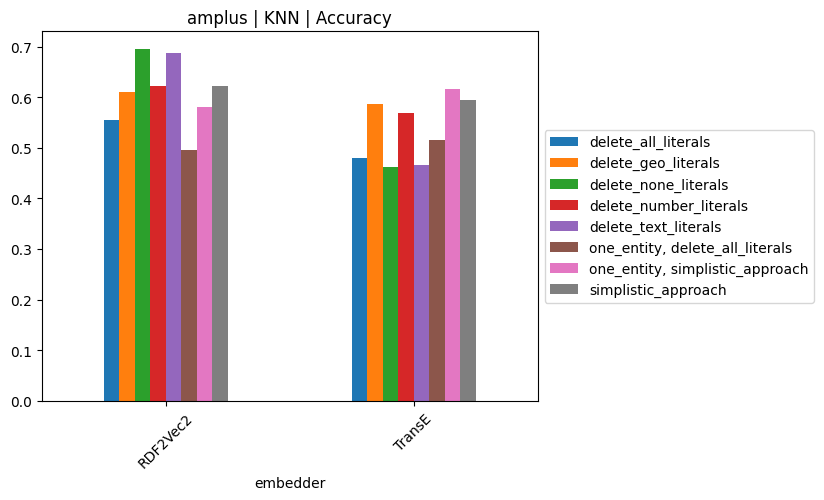

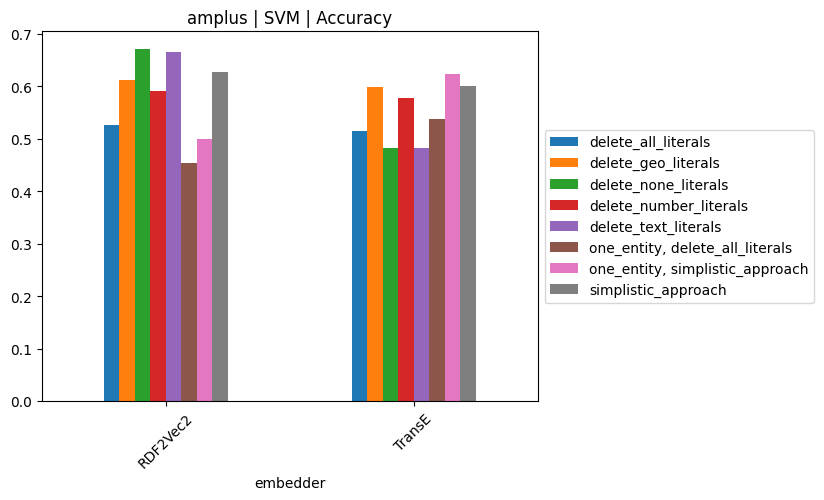

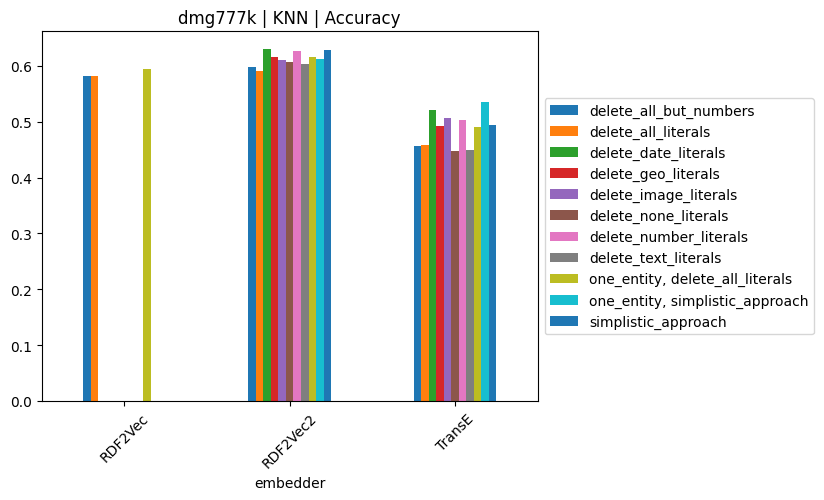

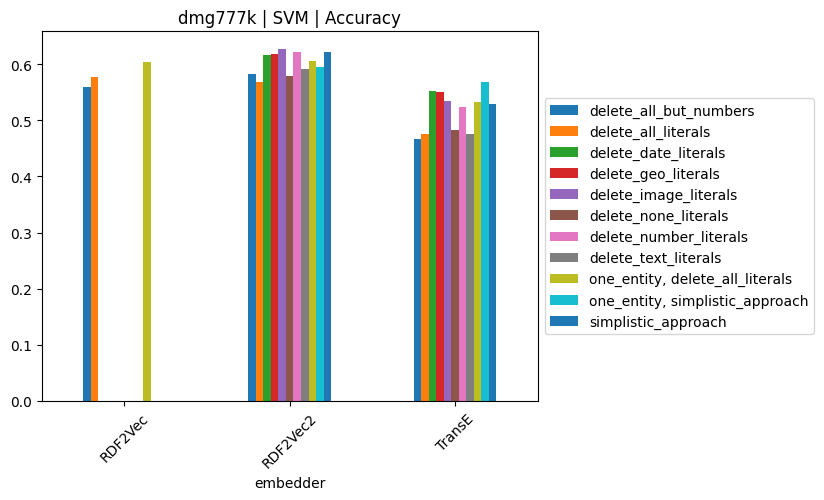

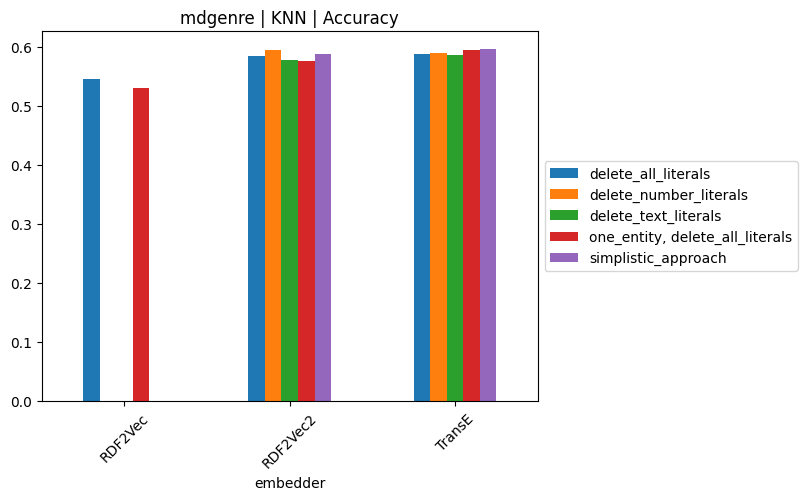

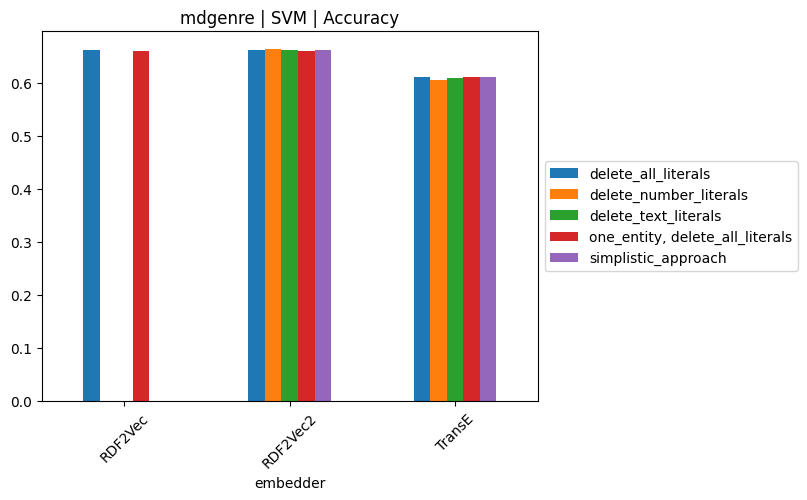

In [128]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

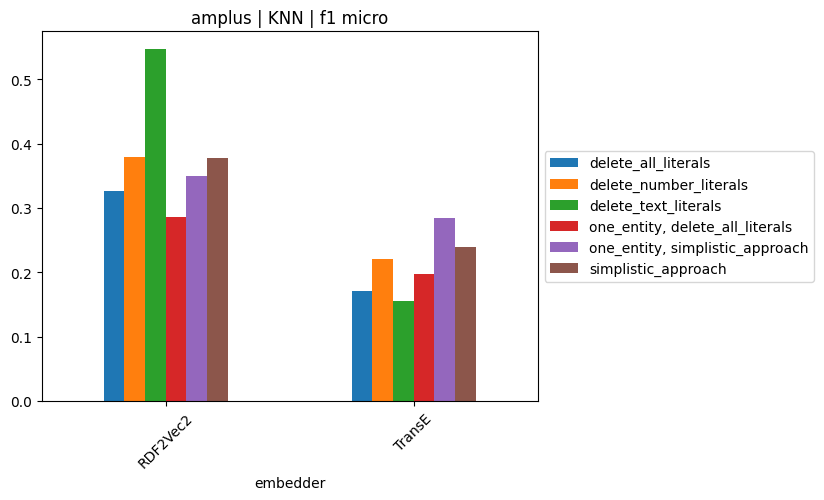

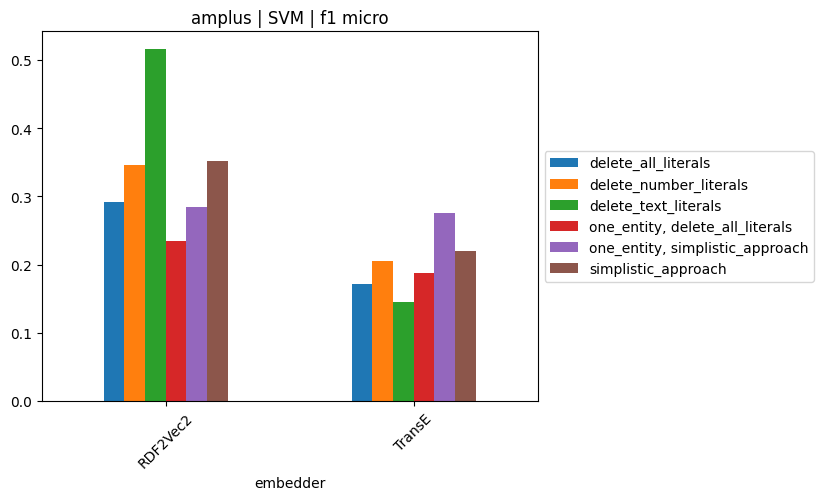

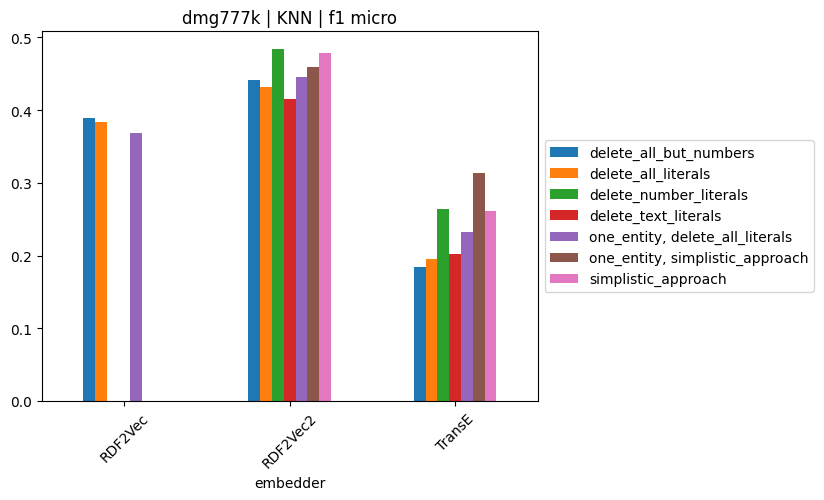

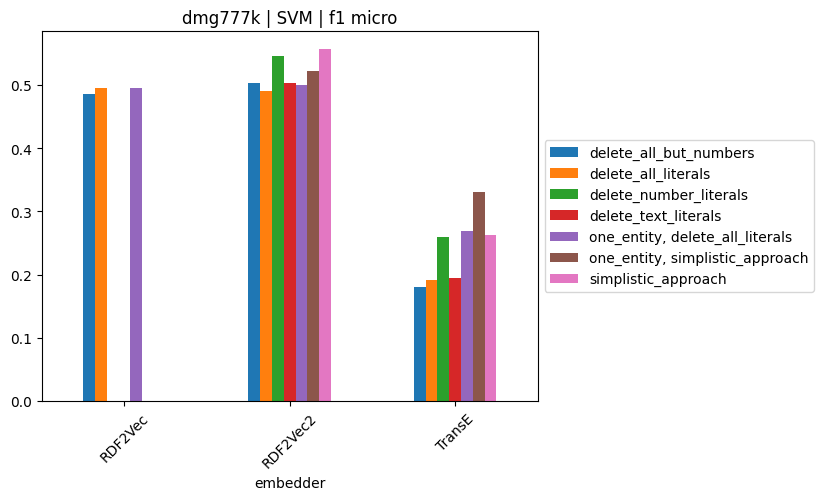

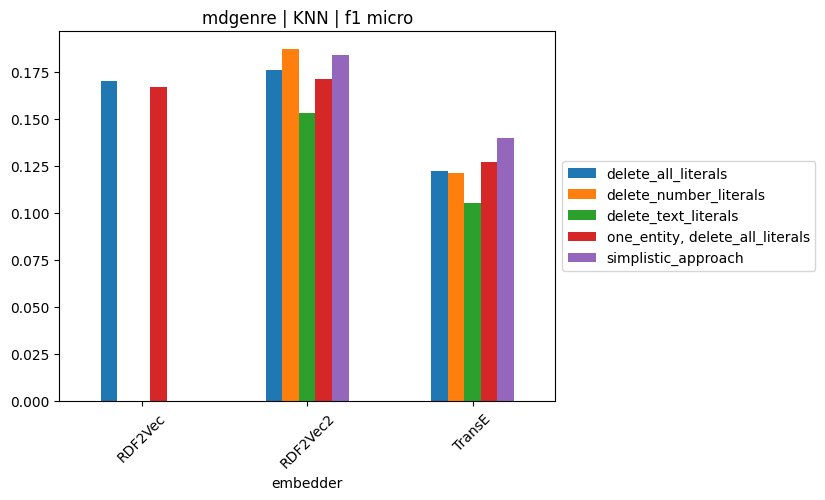

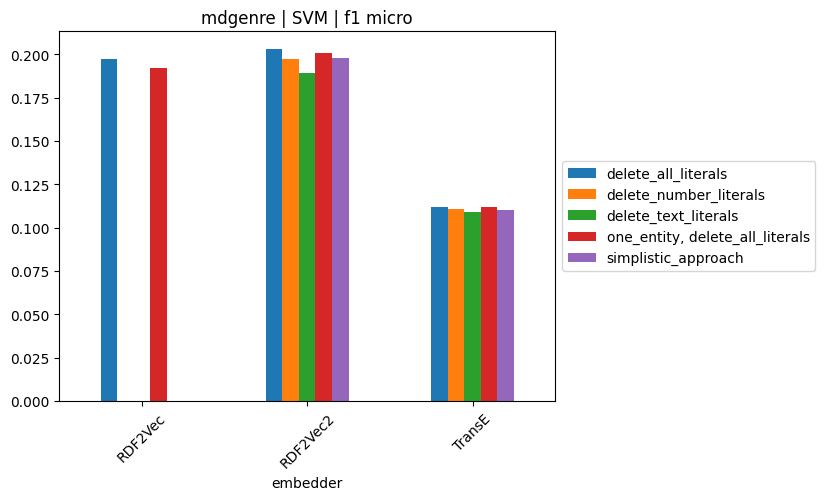

In [90]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Inspect Binning

In [91]:
df[(df['dataset']=='amplus') ].f1_macro

0      0.677
1      0.664
2      0.461
3      0.491
4      0.564
       ...  
117    0.597
118    0.621
119    0.607
120    0.573
121    0.579
Name: f1_macro, Length: 122, dtype: float64

In [92]:
for dataset in df['dataset'].unique():
    df[(df['dataset']=='amplus') &(df['embedder'] != 'RDF2Vec2') ]

In [93]:
df[(df['dataset']=='amplus')&(df['embedder'] != 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro dataset eval_method  \
103     0.623     0.276  amplus         SVM   
27      0.622     0.268  amplus         SVM   
102     0.616     0.285  amplus         KNN   
26      0.615     0.297  amplus         KNN   
7       0.609     0.230  amplus         SVM   
71      0.607     0.233  amplus         SVM   
6       0.605     0.264  amplus         KNN   
55      0.604     0.228  amplus         SVM   
35      0.603     0.224  amplus         SVM   
70      0.602     0.250  amplus         KNN   

                                                 steps embedder  
103                    one_entity, simplistic_approach   TransE  
27   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
102                    one_entity, simplistic_approach   TransE  
26   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
7                                       bin_numbers_10   TransE  
71       bin_numbers_percentage_3, simplistic_approach   TransE  
6                                       bin_numbers_10   TransE  
55   bin_numbers_lof_percentage_3, simplistic_approach   TransE  
35             bin_numbers_lof_10, simplistic_approach   TransE  
70       bin_numbers_percentage_3, simplistic_approach   TransE

In [94]:
df.head(10)

f1_macro  f1_micro dataset eval_method  \
0     0.677     0.542  amplus         KNN   
1     0.664     0.501  amplus         SVM   
2     0.461     0.162  amplus         KNN   
3     0.491     0.148  amplus         SVM   
4     0.564     0.302  amplus         KNN   
5     0.602     0.297  amplus         SVM   
6     0.605     0.264  amplus         KNN   
7     0.609     0.230  amplus         SVM   
8     0.556     0.311  amplus         KNN   
9     0.541     0.299  amplus         SVM   

                                        steps  embedder  
0  LDA_topic_assignment, delete_text_literals  RDF2Vec2  
1  LDA_topic_assignment, delete_text_literals  RDF2Vec2  
2  LDA_topic_assignment, delete_text_literals    TransE  
3  LDA_topic_assignment, delete_text_literals    TransE  
4                              bin_numbers_10  RDF2Vec2  
5                              bin_numbers_10  RDF2Vec2  
6                              bin_numbers_10    TransE  
7                              bin_numbers_10    TransE  
8      bin_numbers_10, delete_number_literals  RDF2Vec2  
9      bin_numbers_10, delete_number_literals  RDF2Vec2

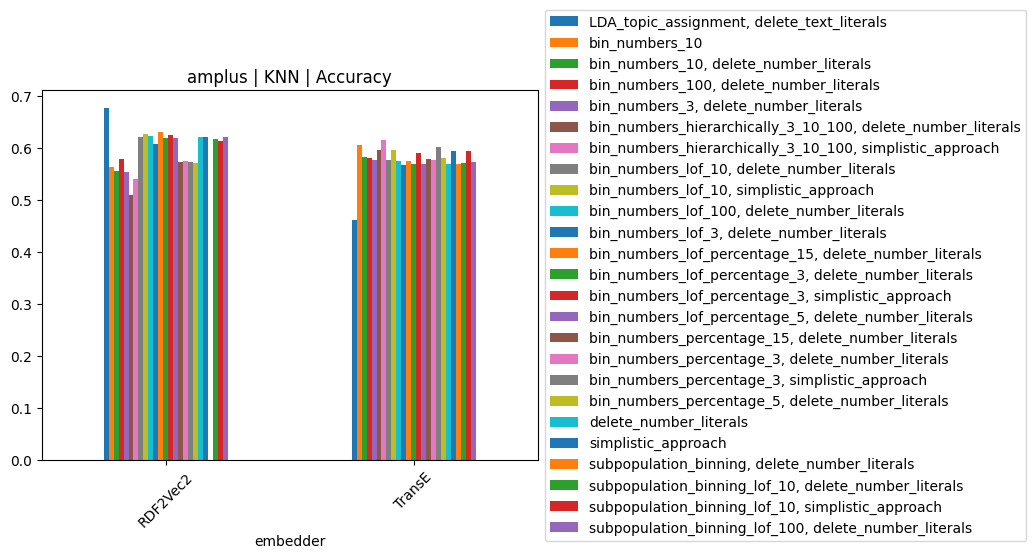

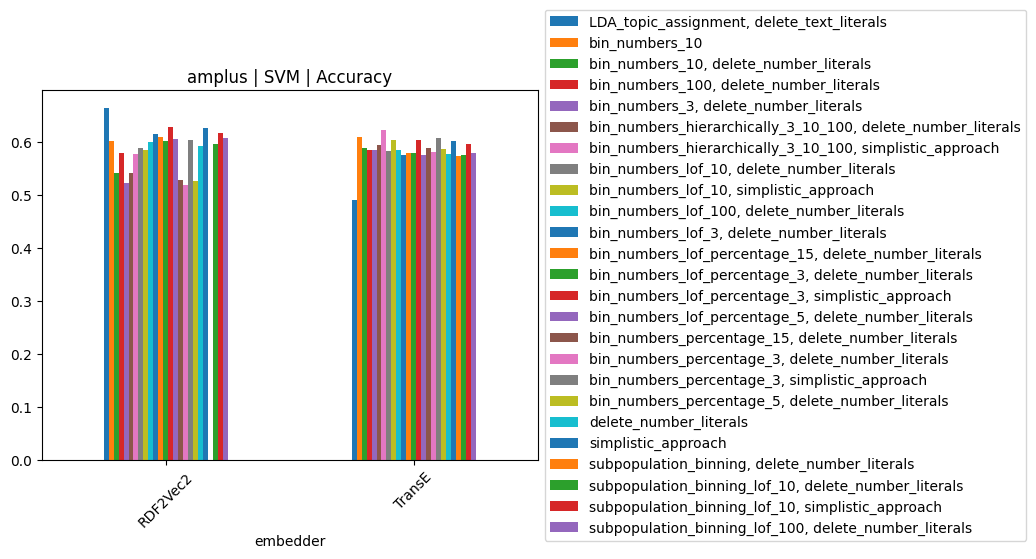

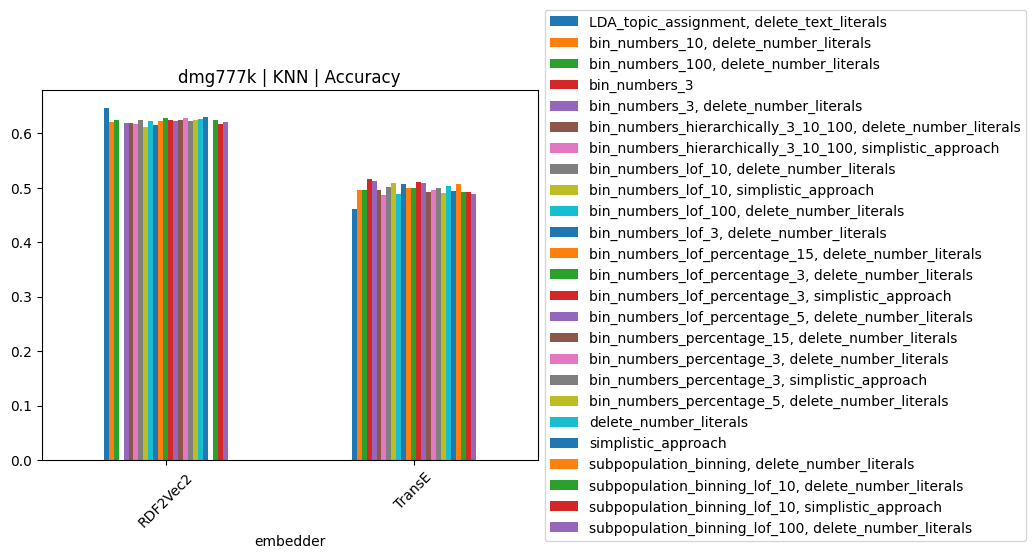

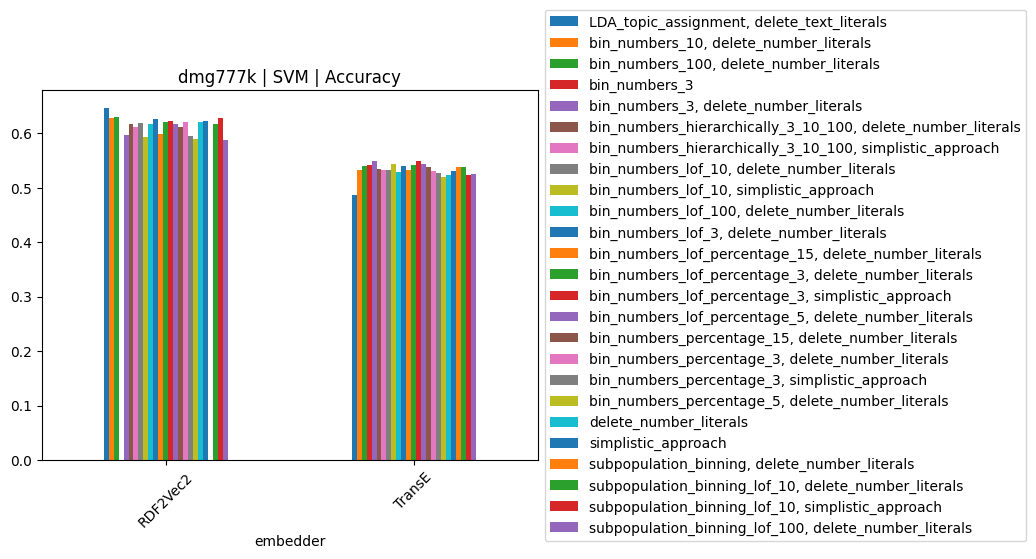

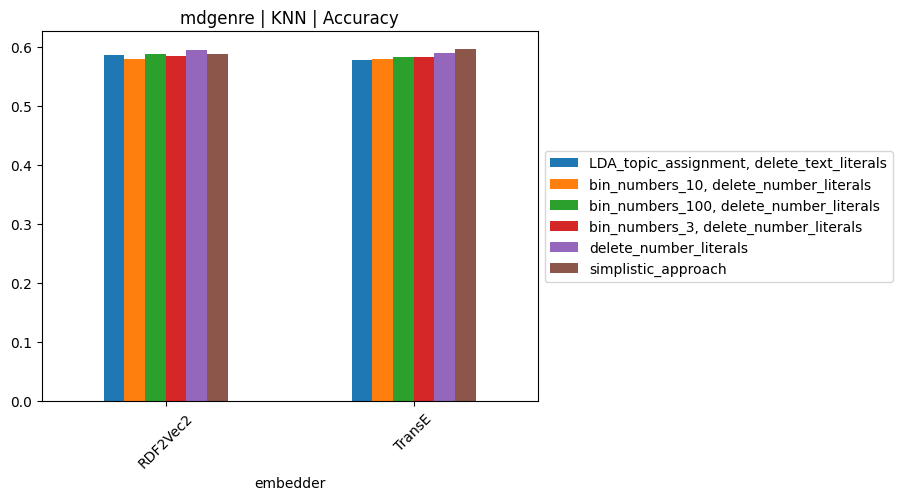

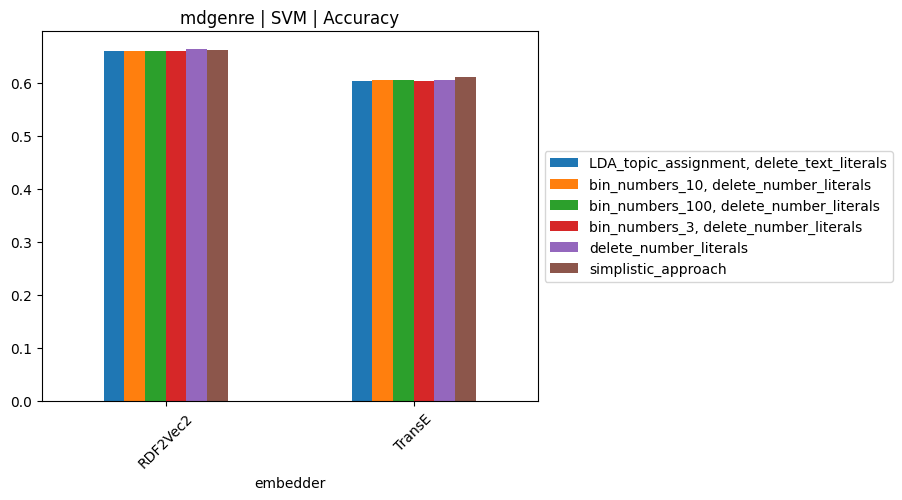

In [95]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

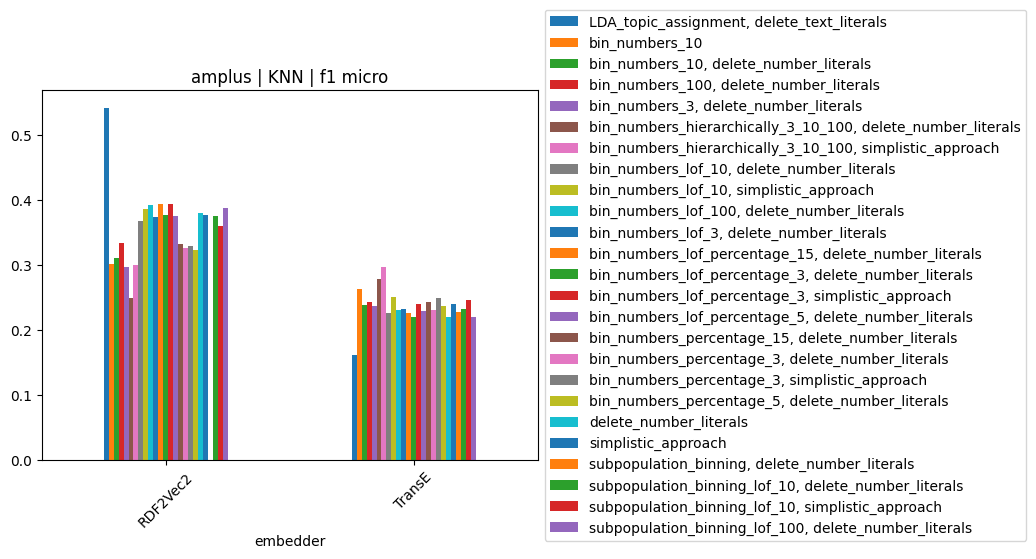

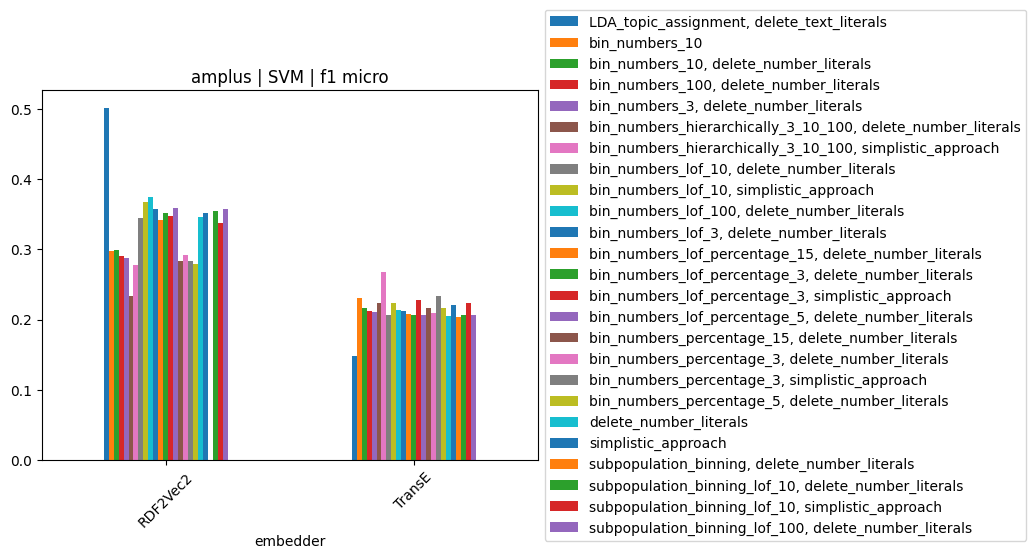

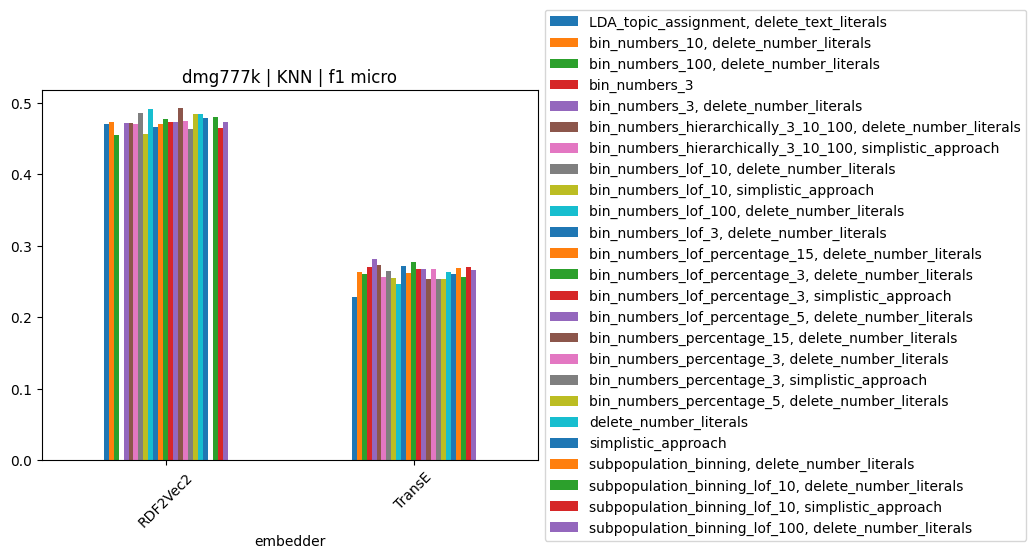

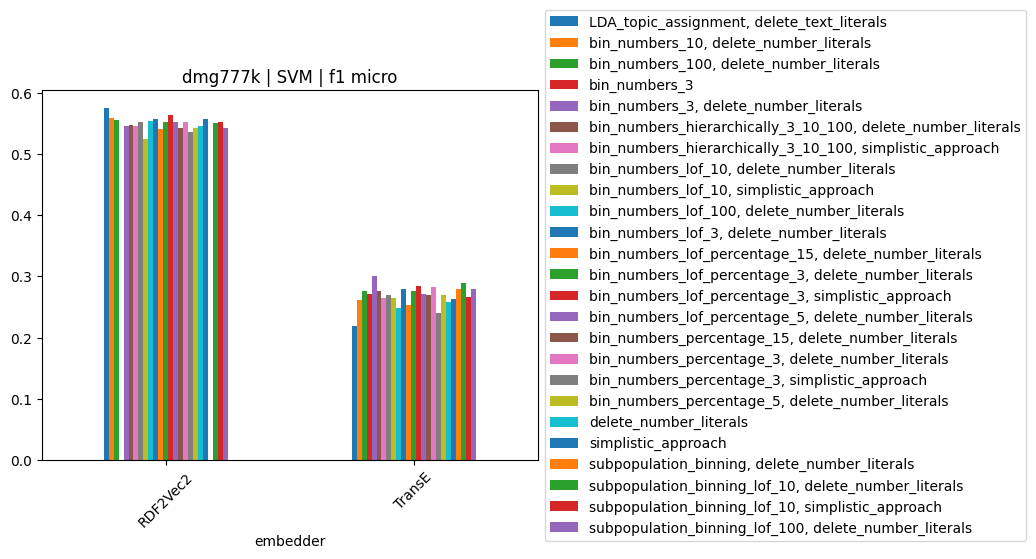

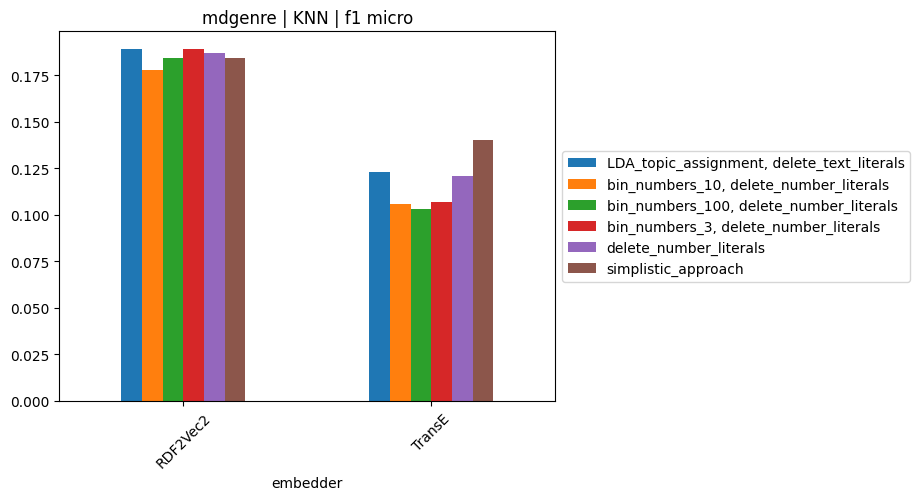

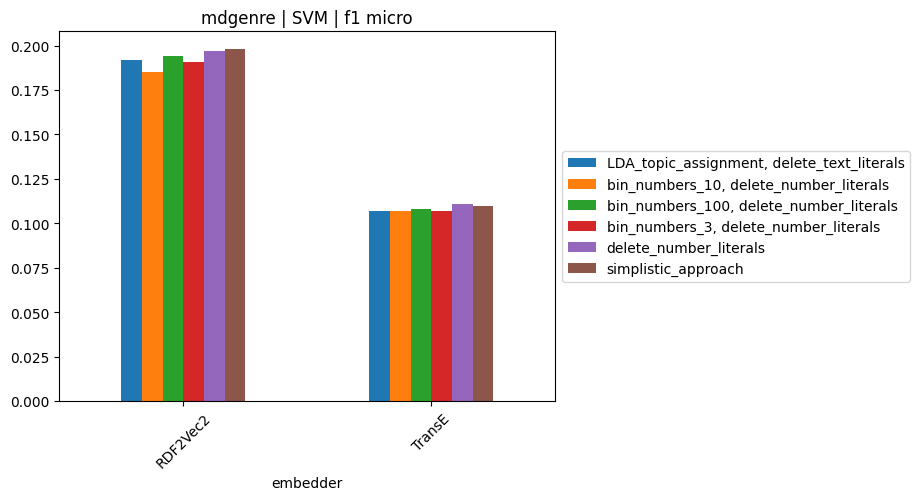

In [96]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

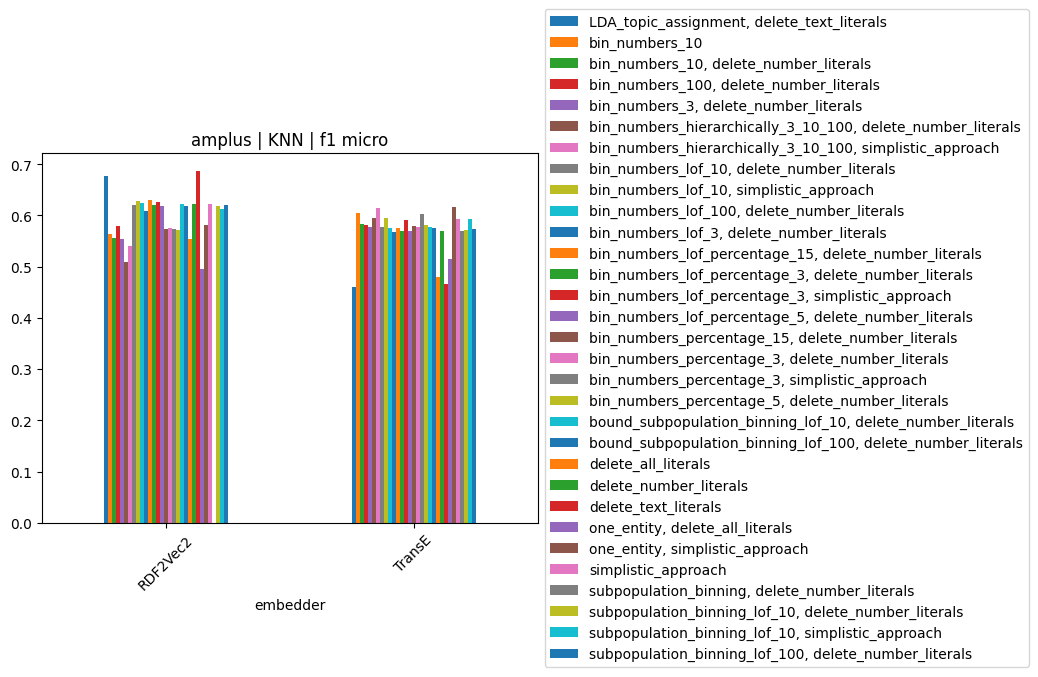

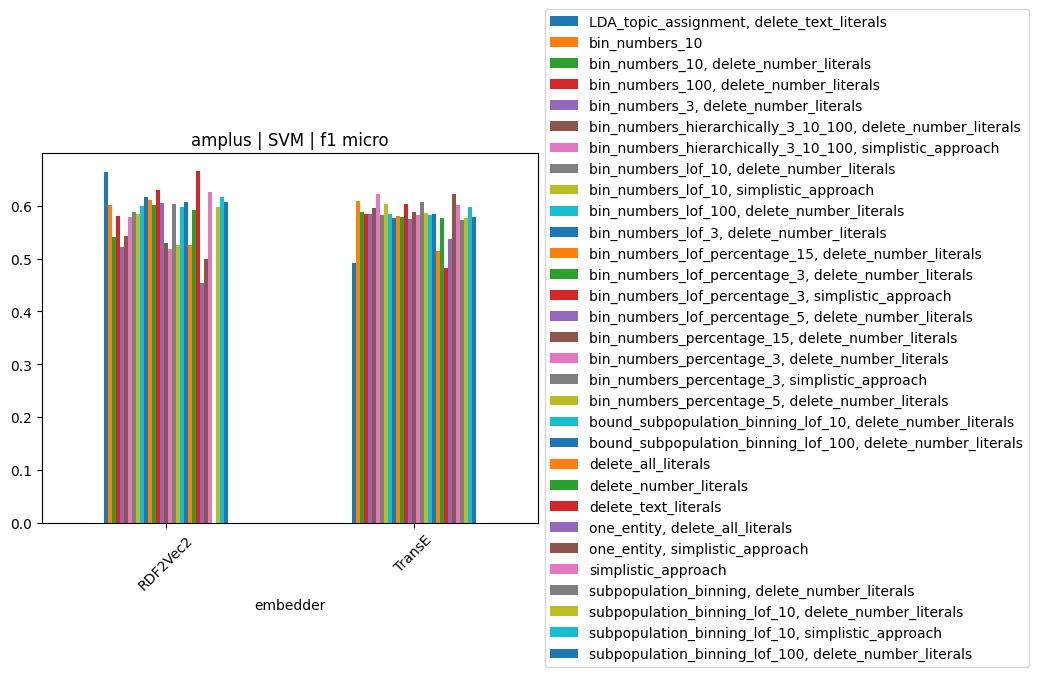

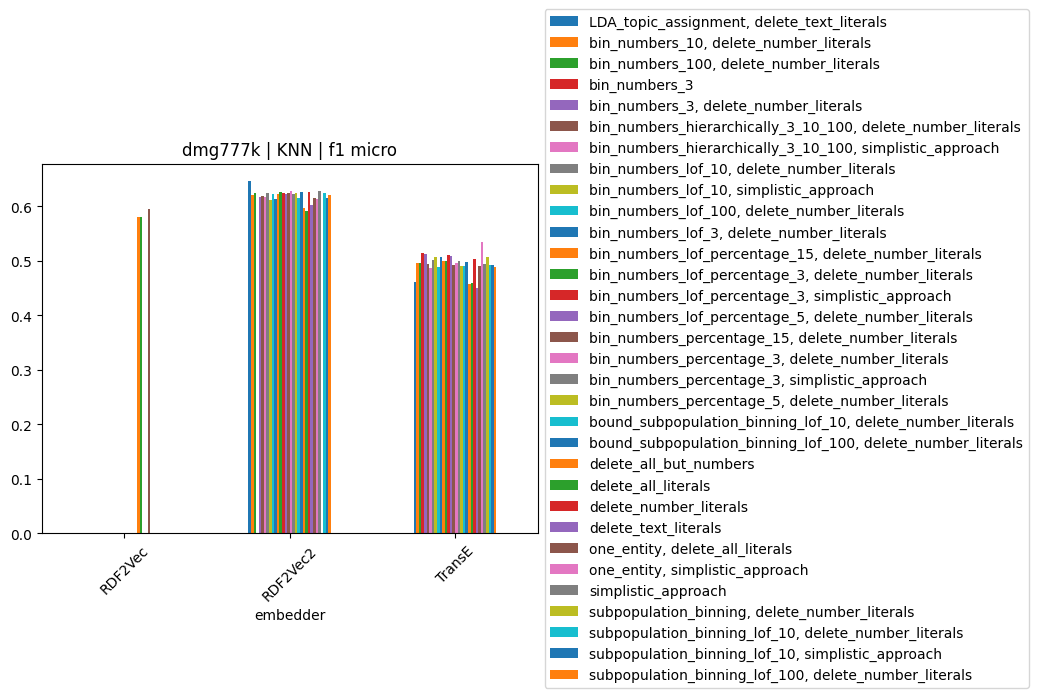

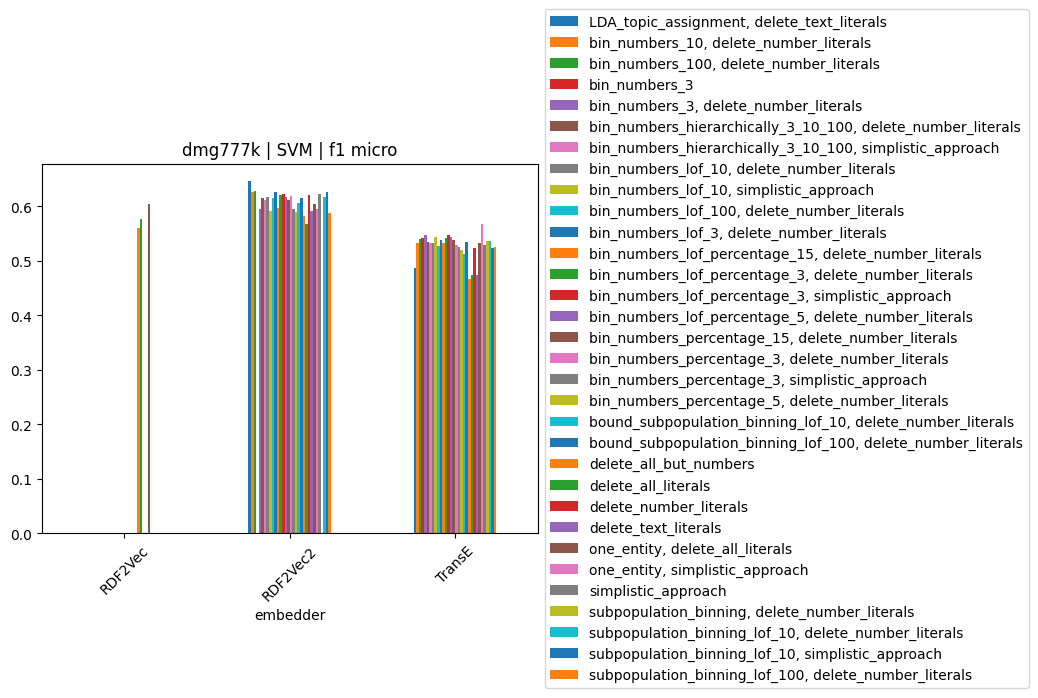

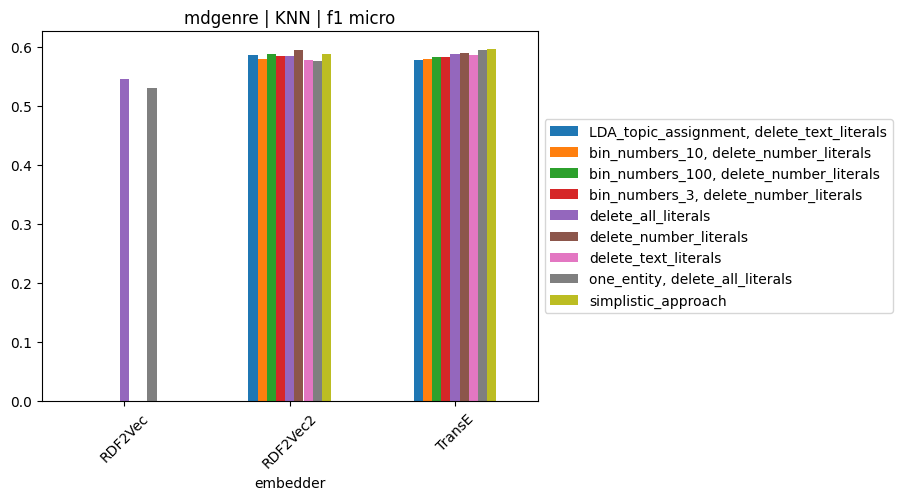

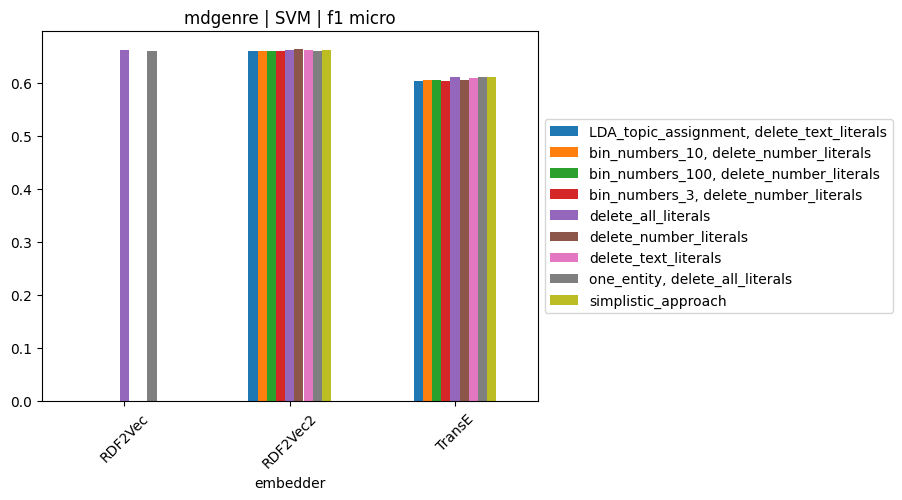

In [97]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

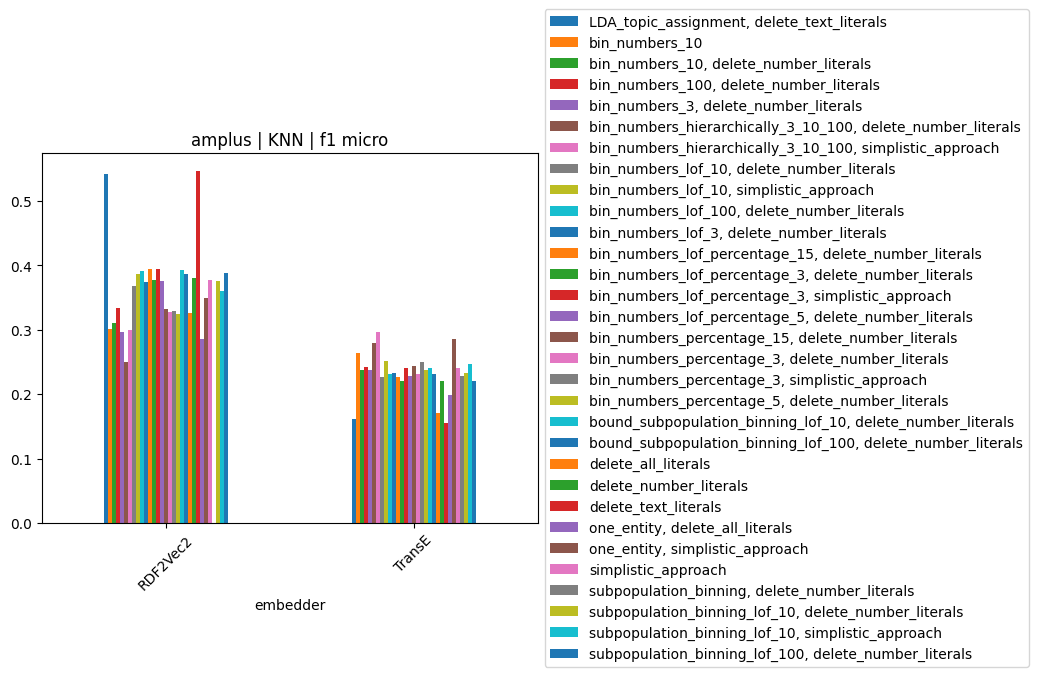

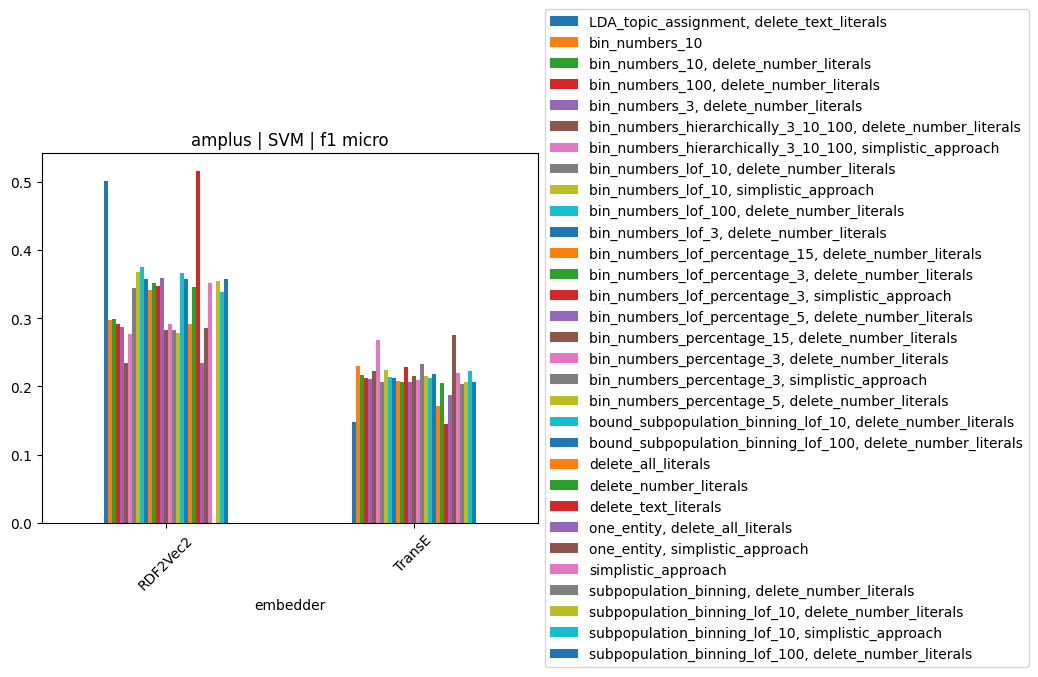

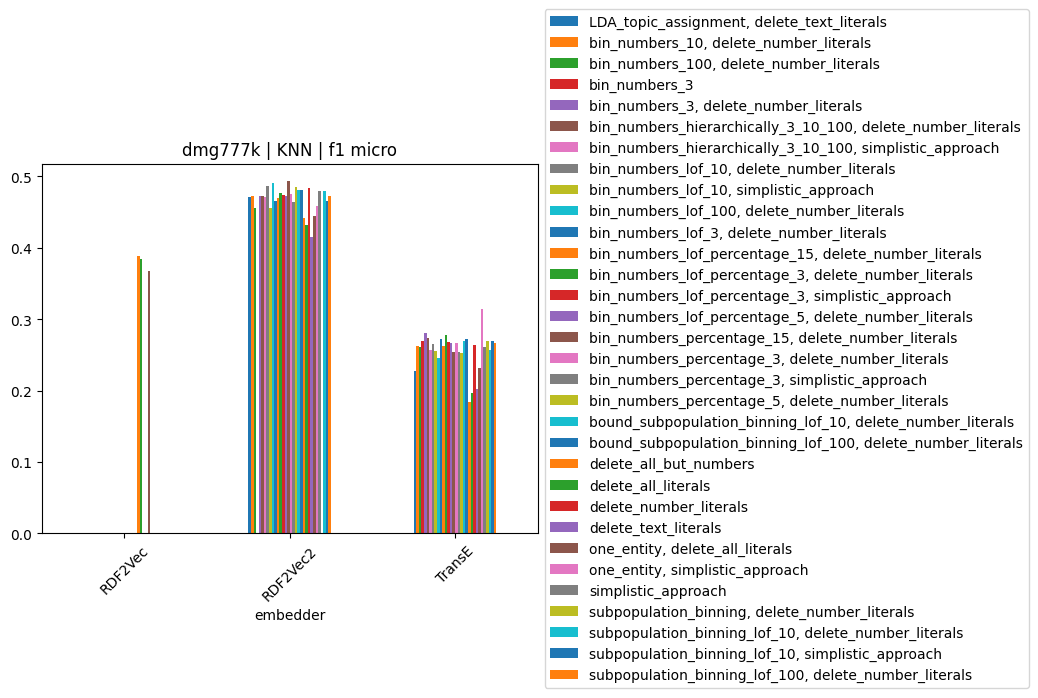

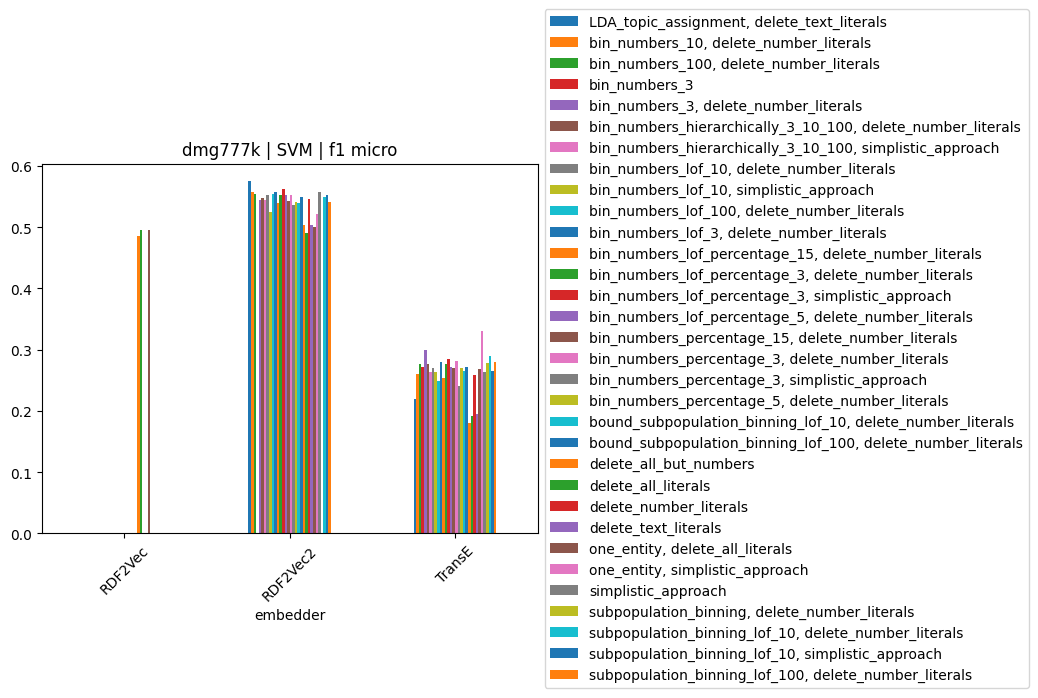

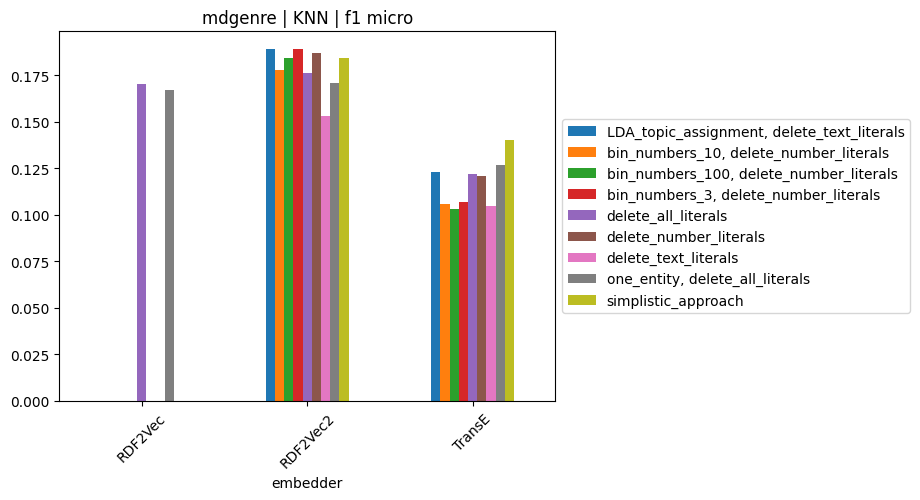

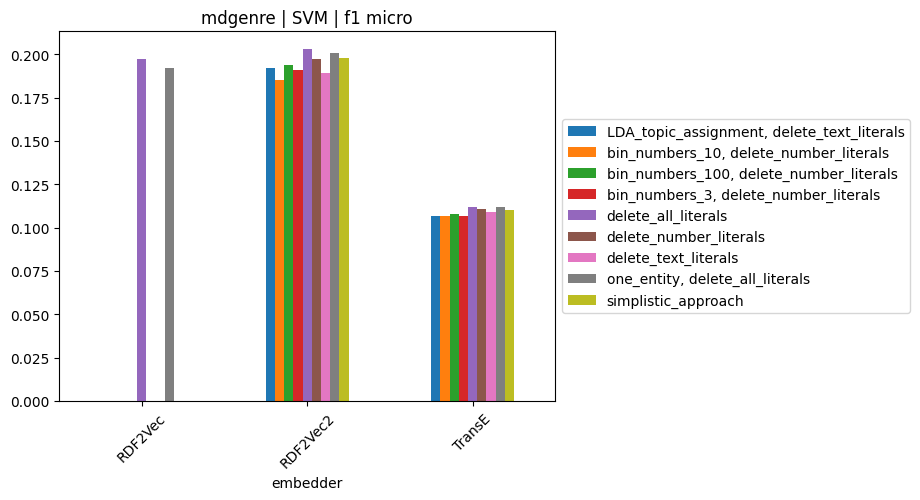

In [98]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 06.04

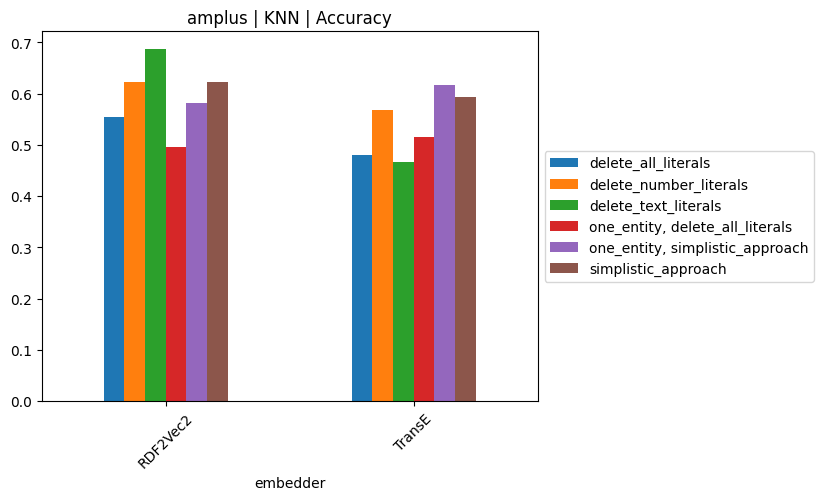

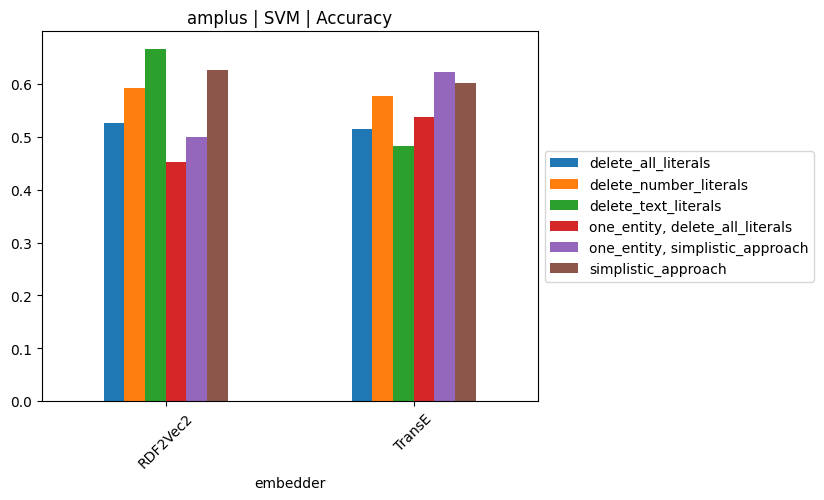

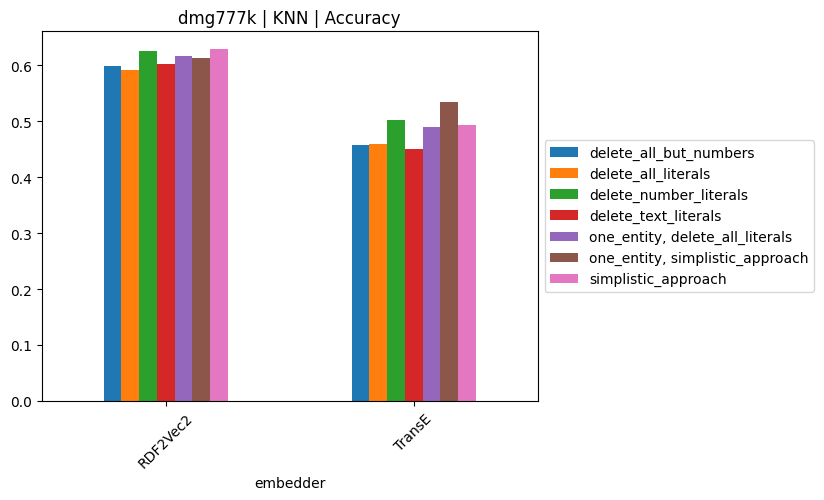

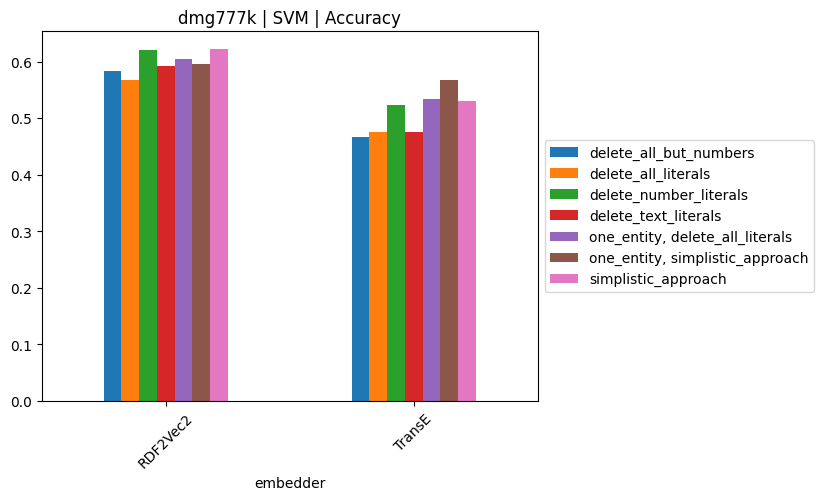

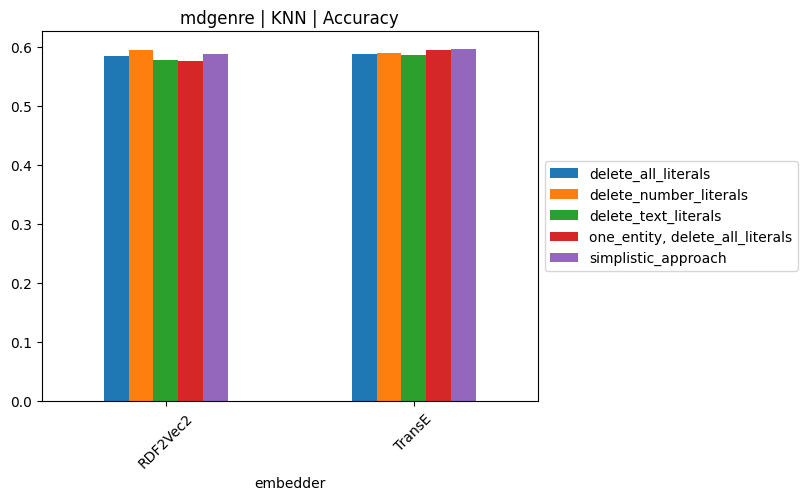

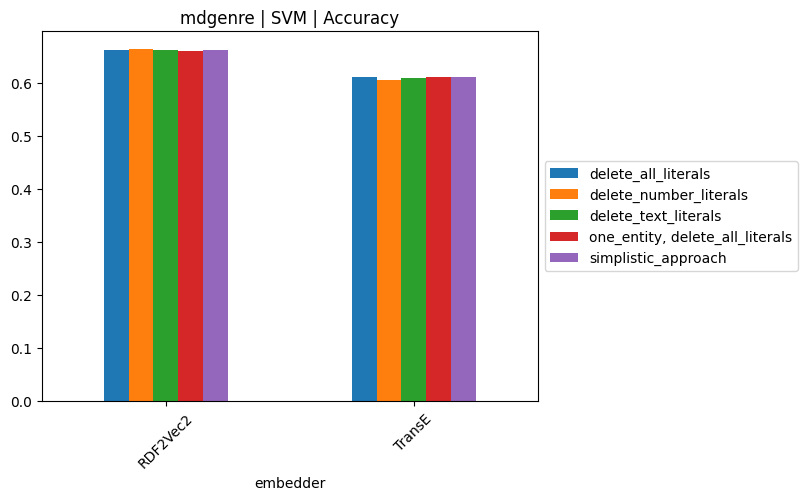

In [99]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|simplistic).*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

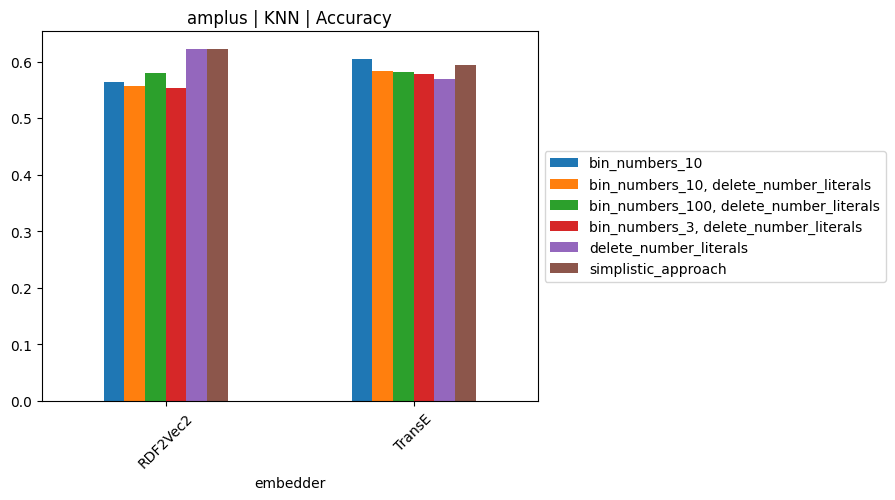

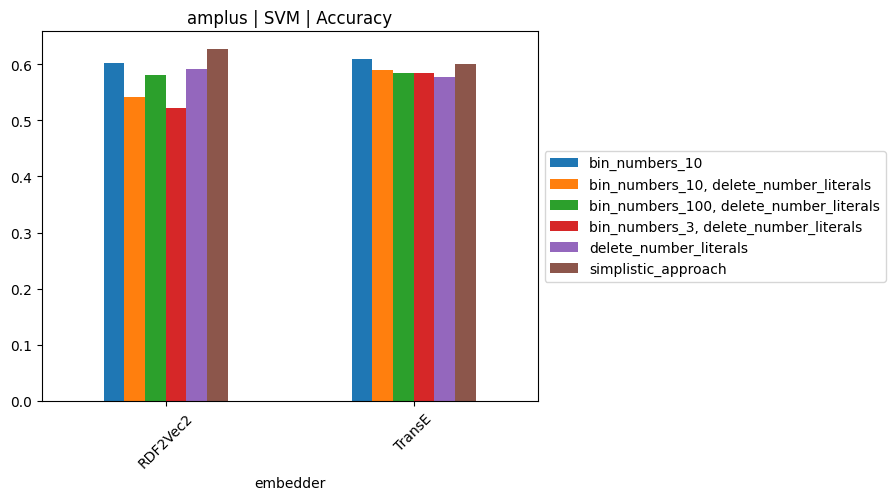

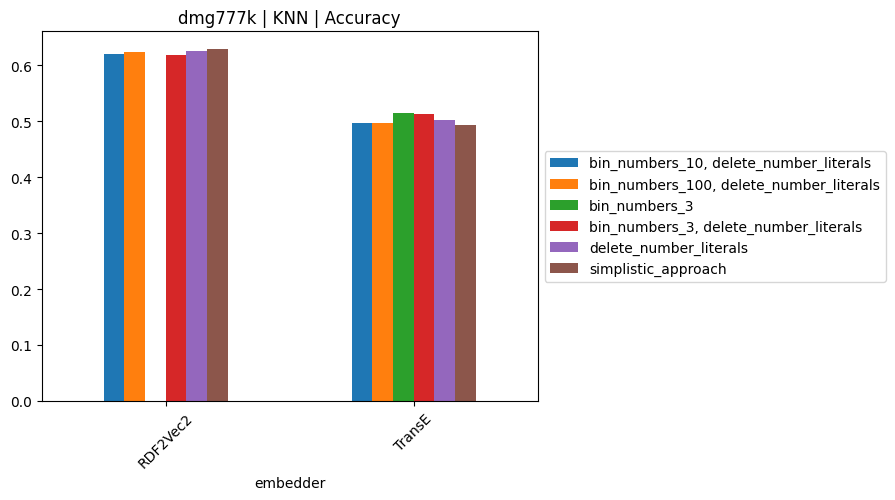

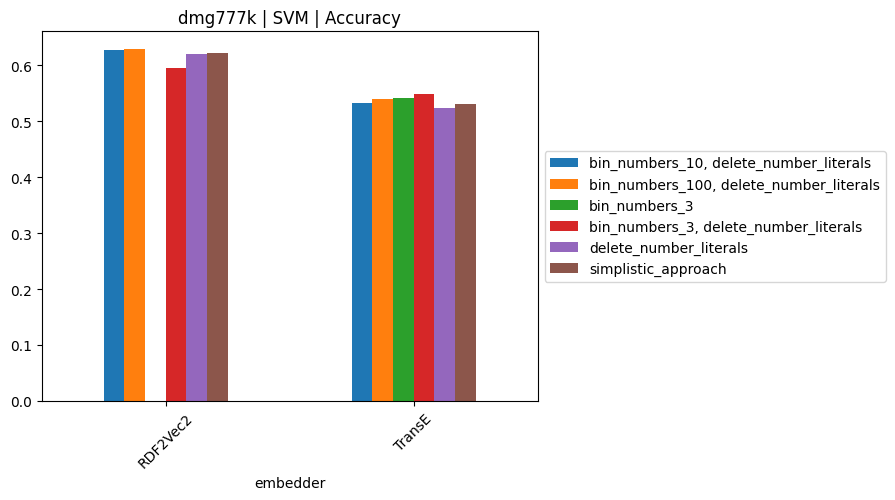

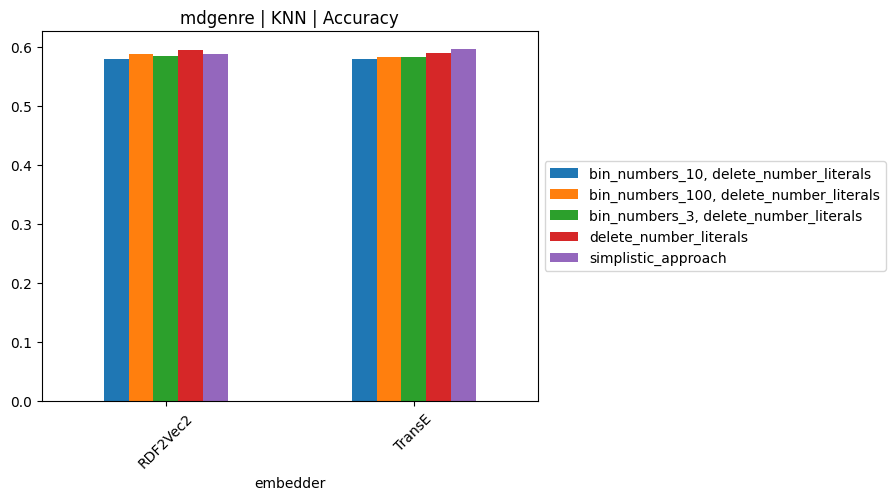

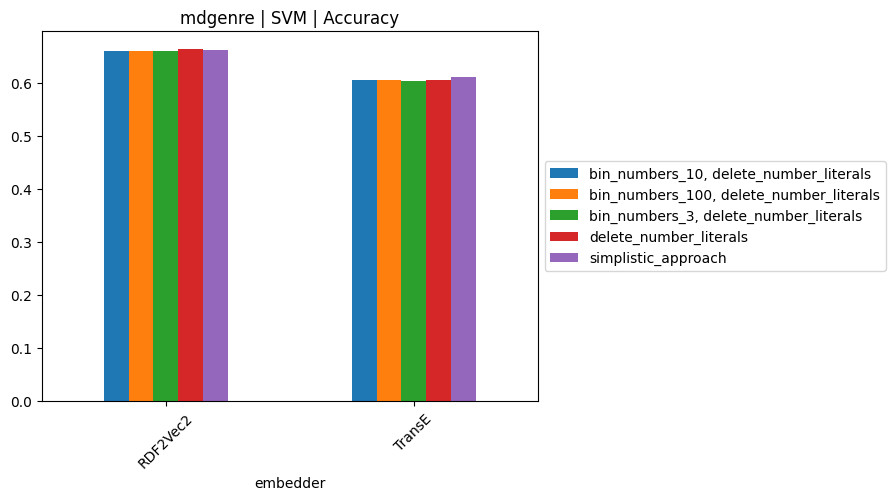

In [106]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_)[0-9])+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_)[0-9]|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

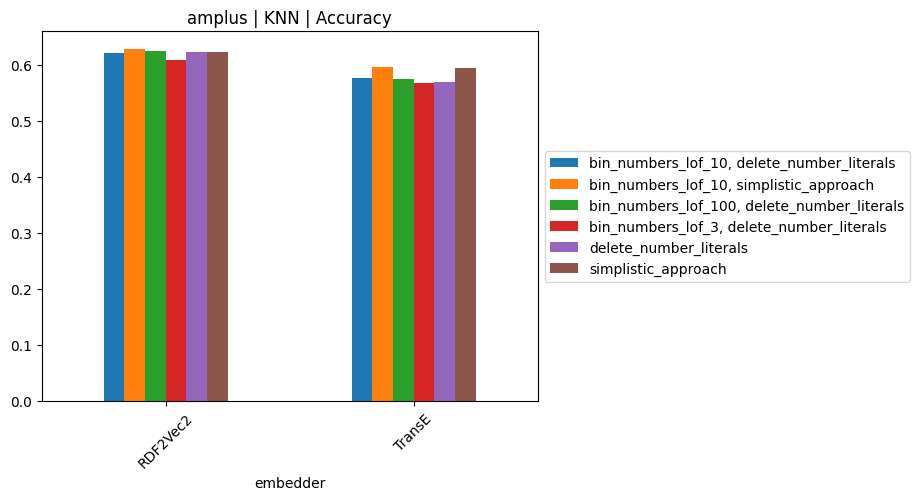

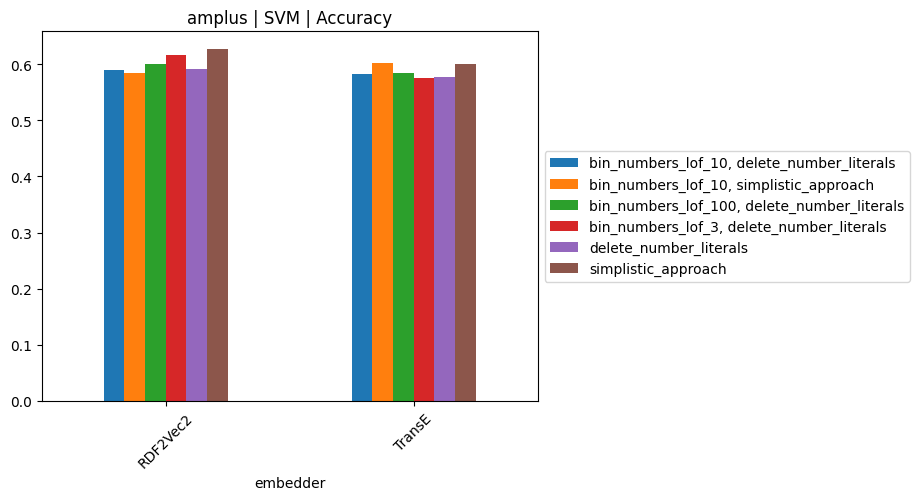

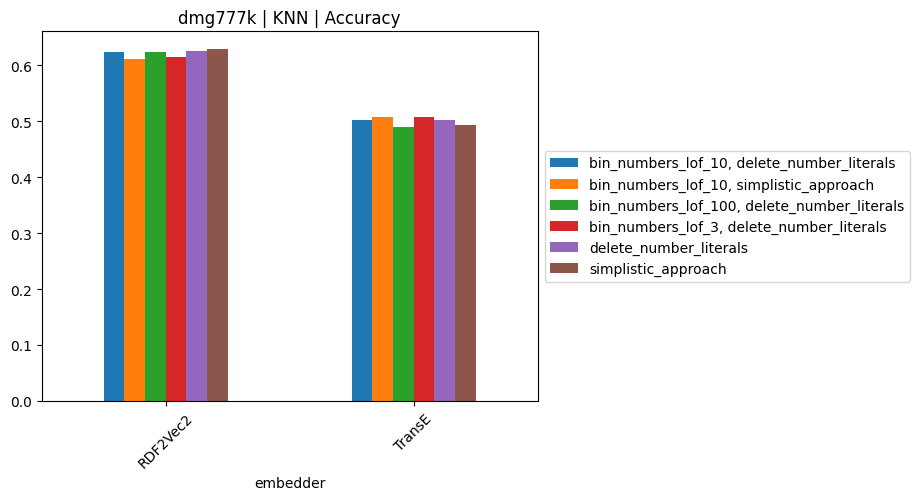

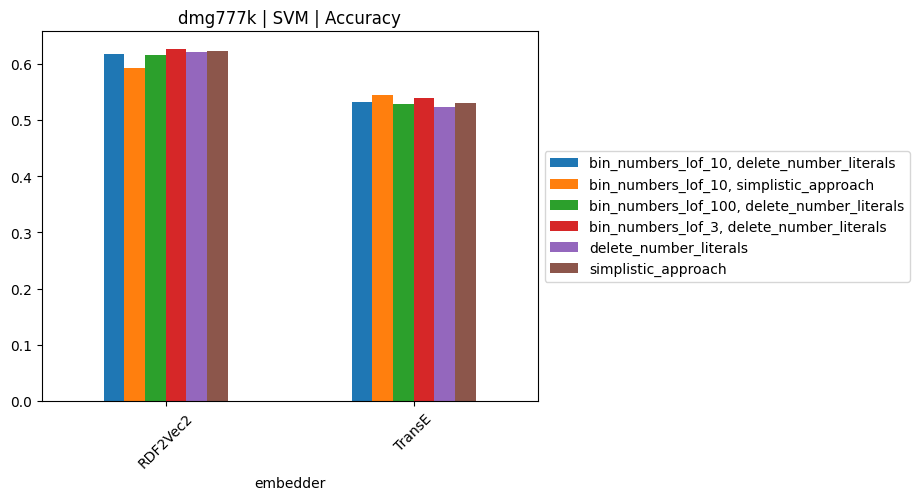

In [107]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_lof_)[0-9])+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_lof_)[0-9]|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

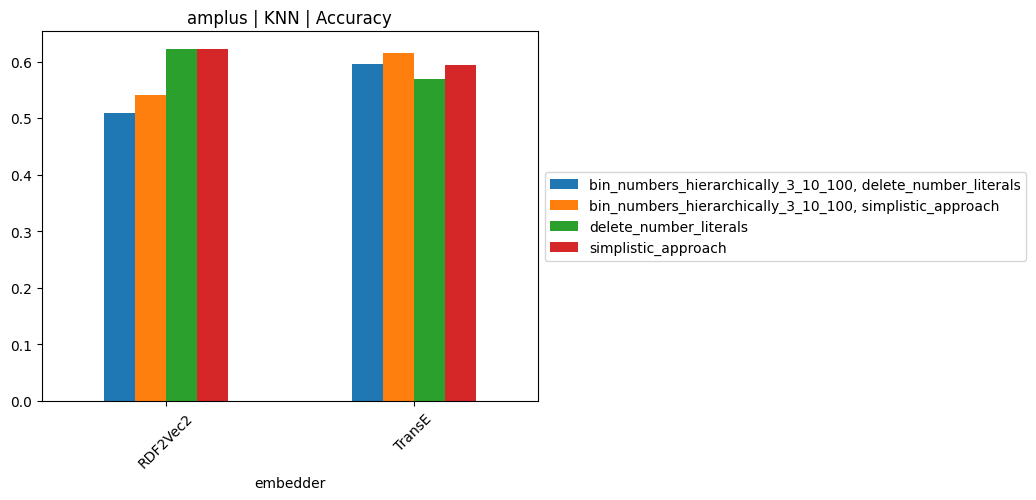

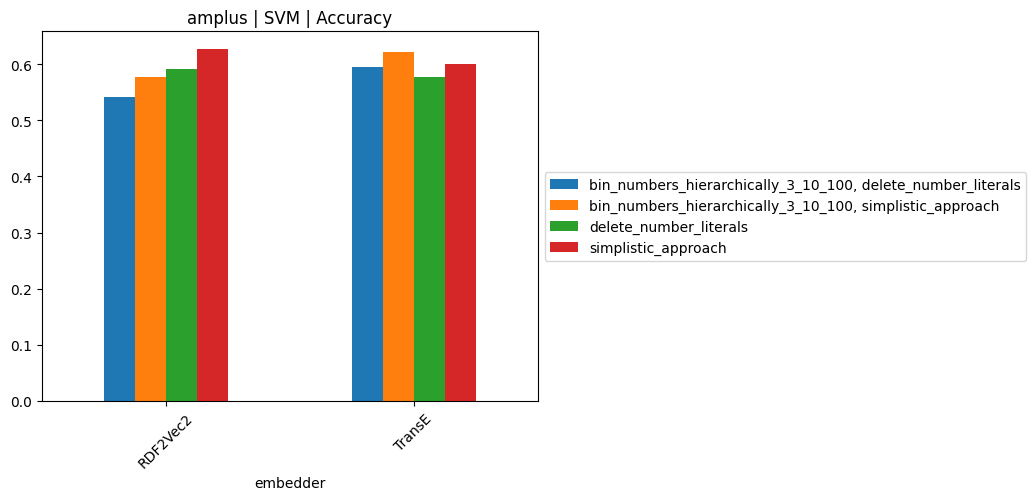

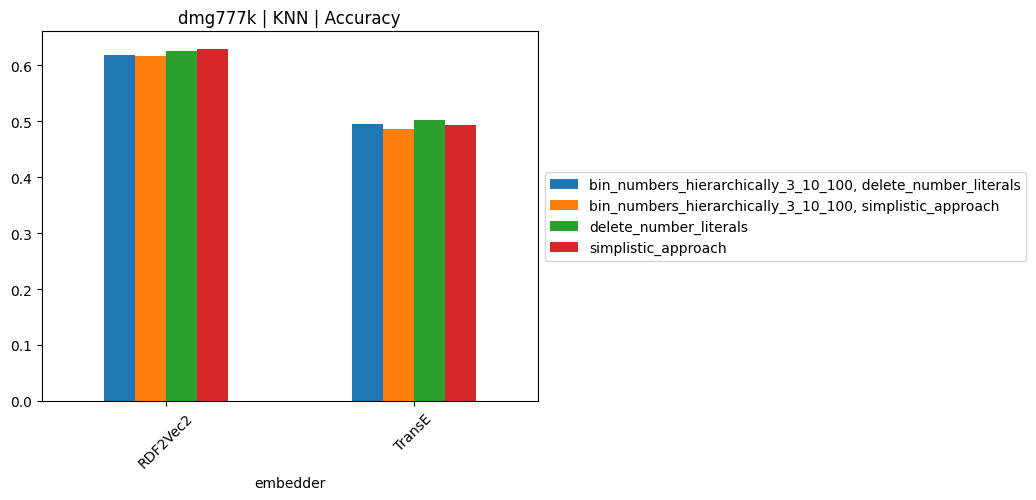

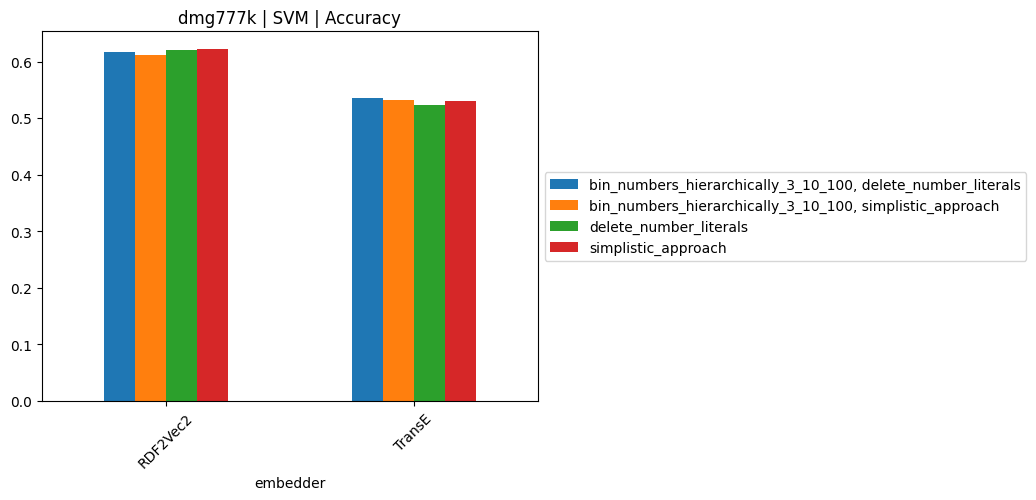

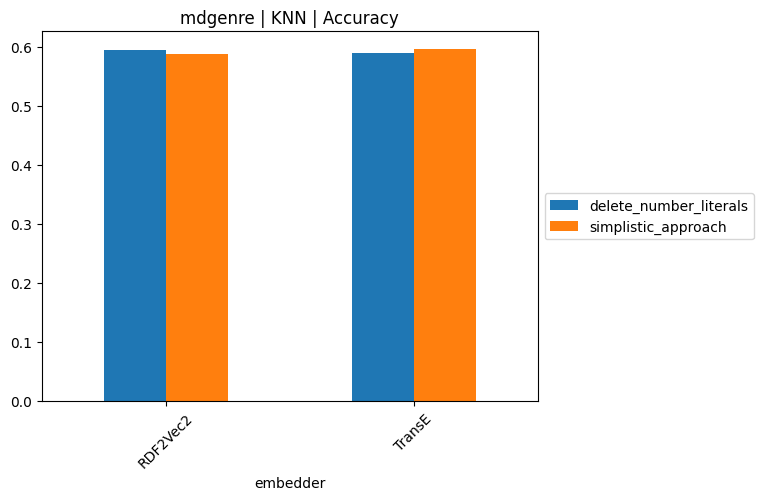

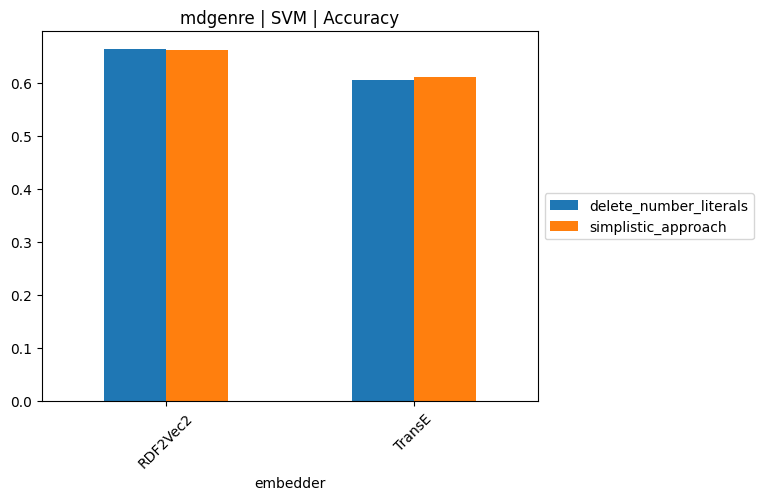

In [110]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_h)|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

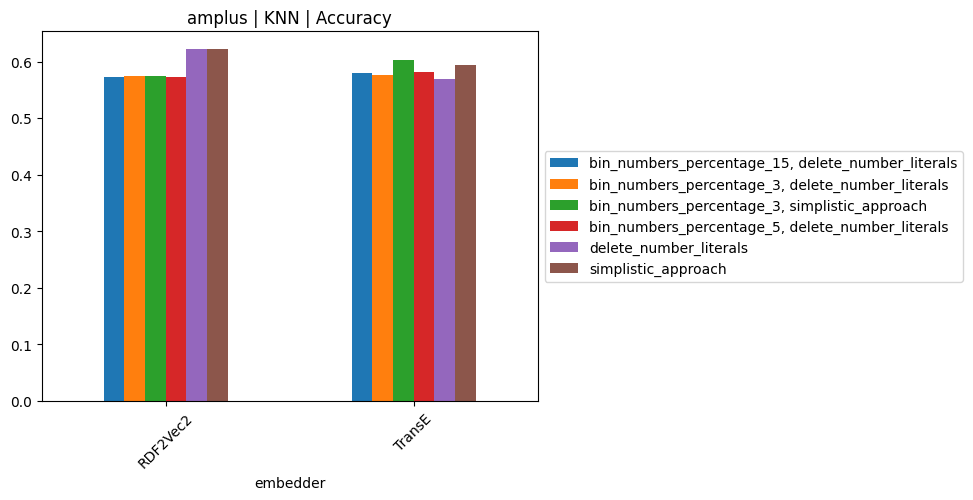

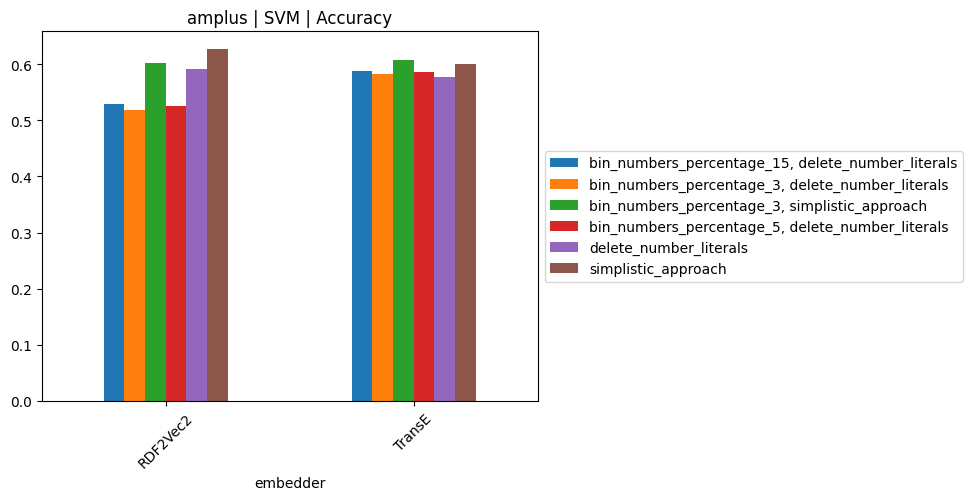

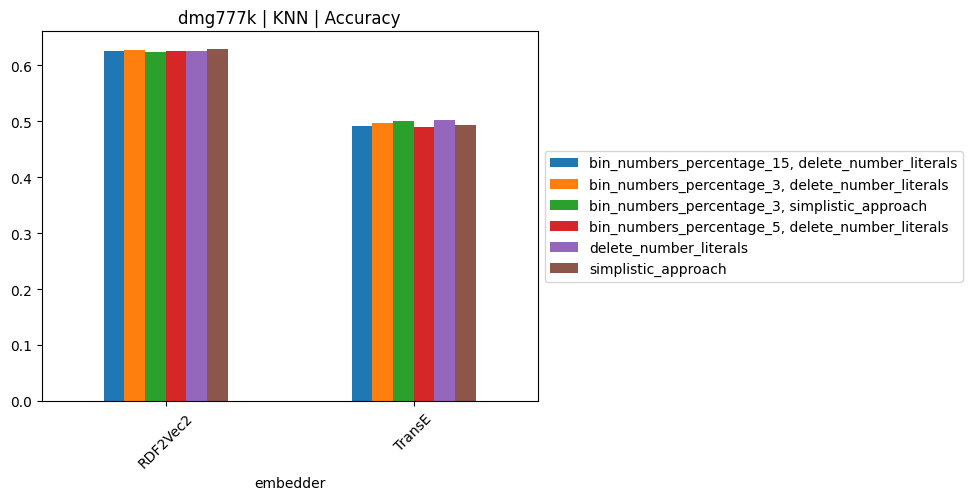

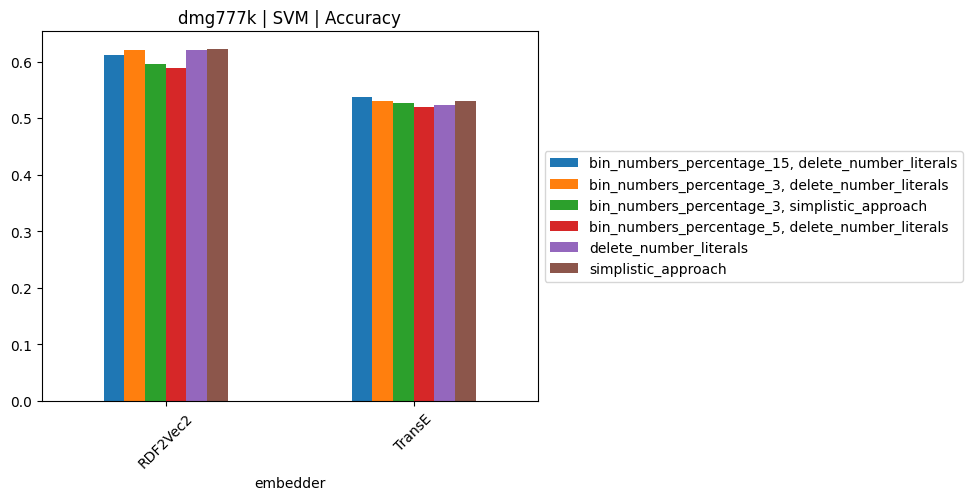

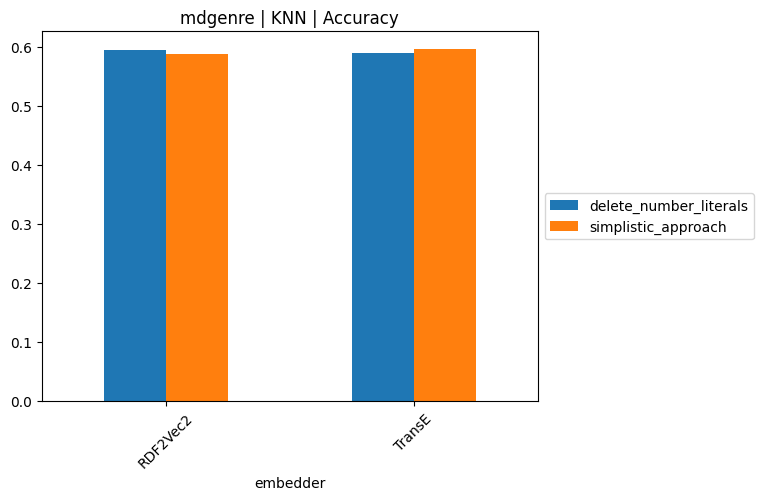

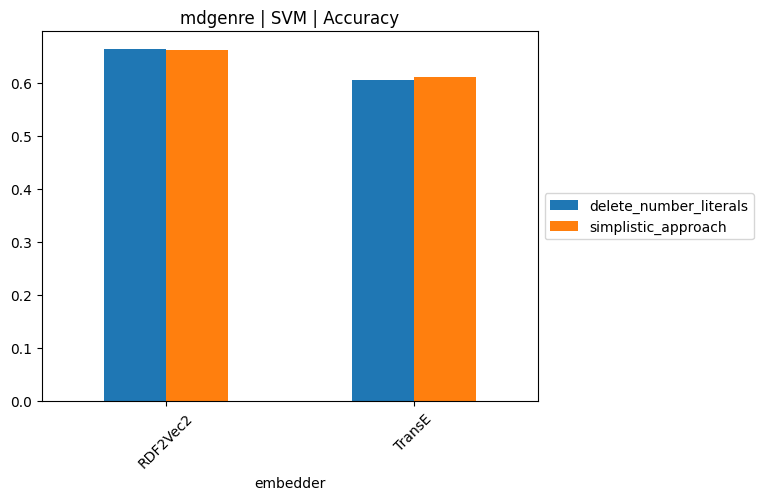

In [112]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_p)|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

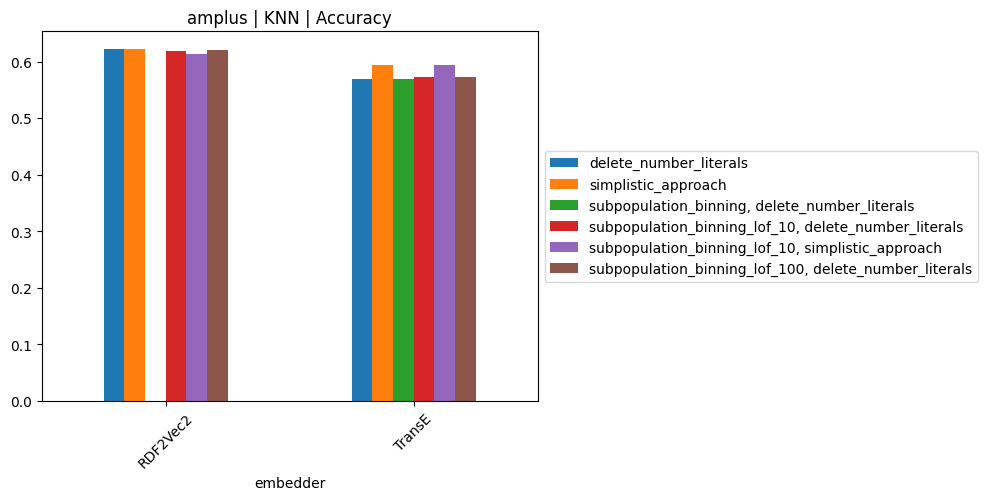

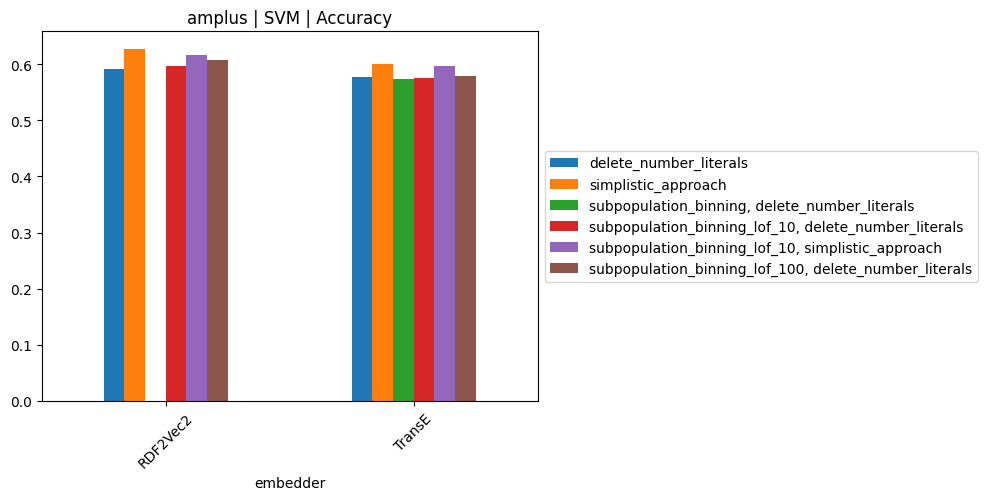

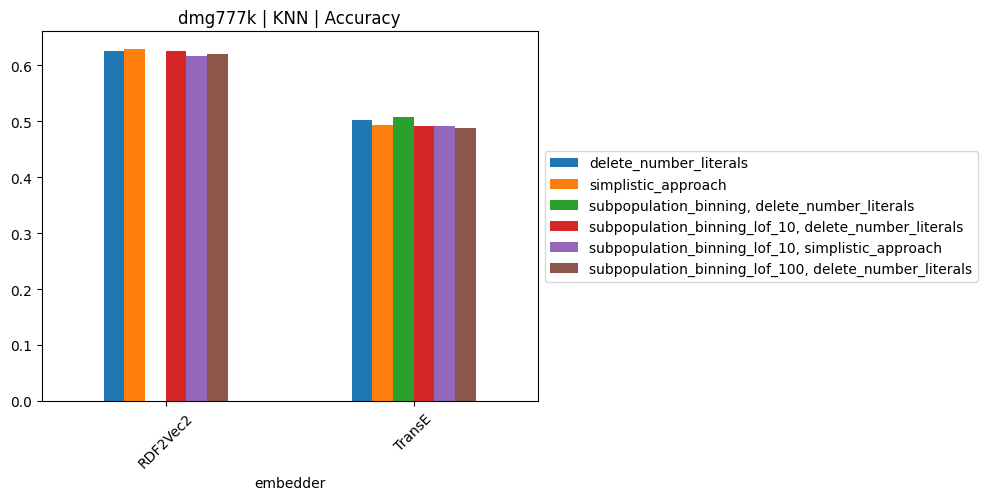

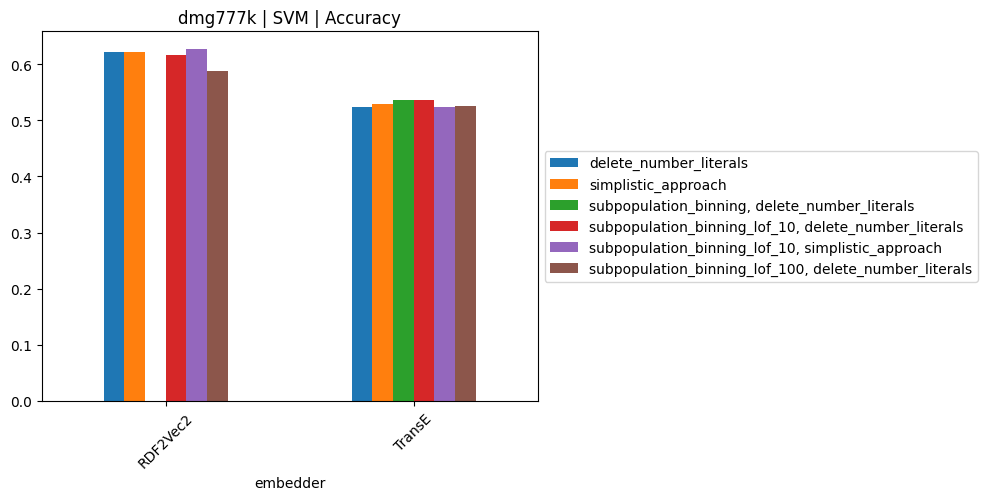

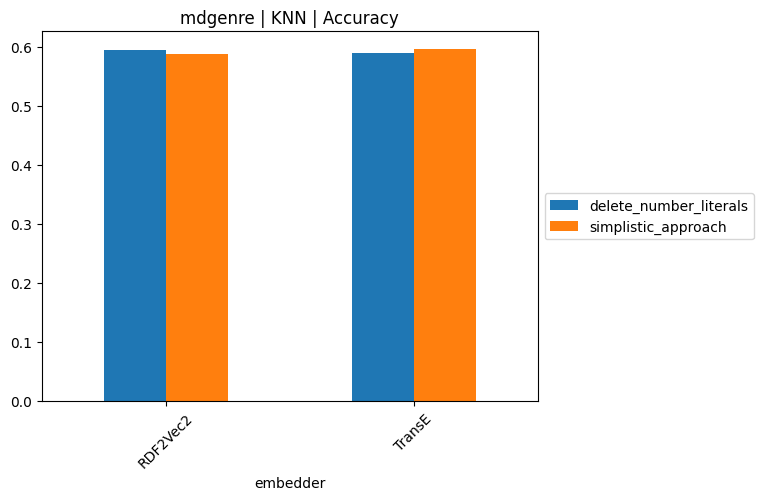

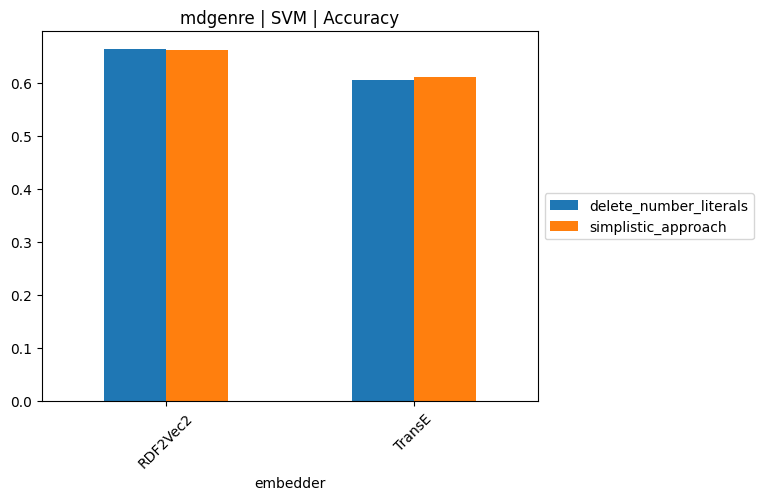

In [114]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(subpop|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

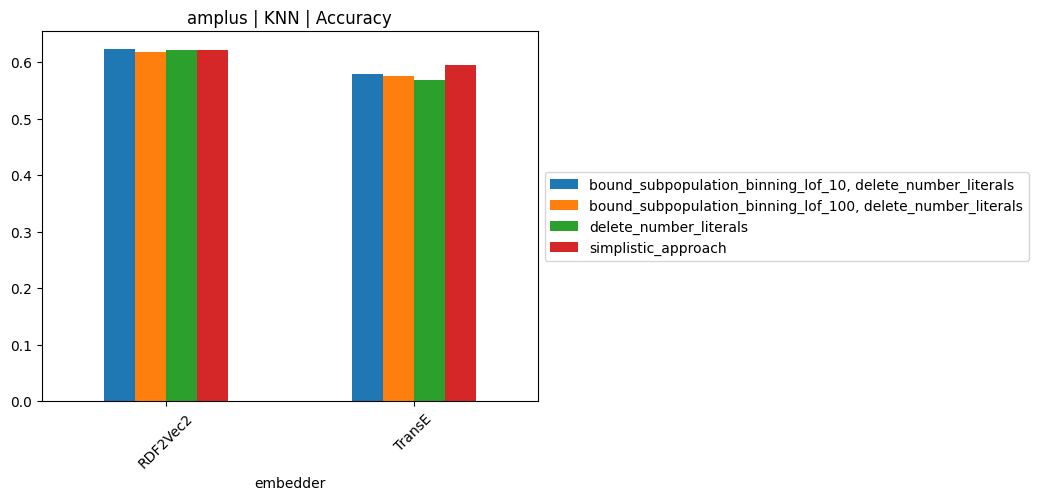

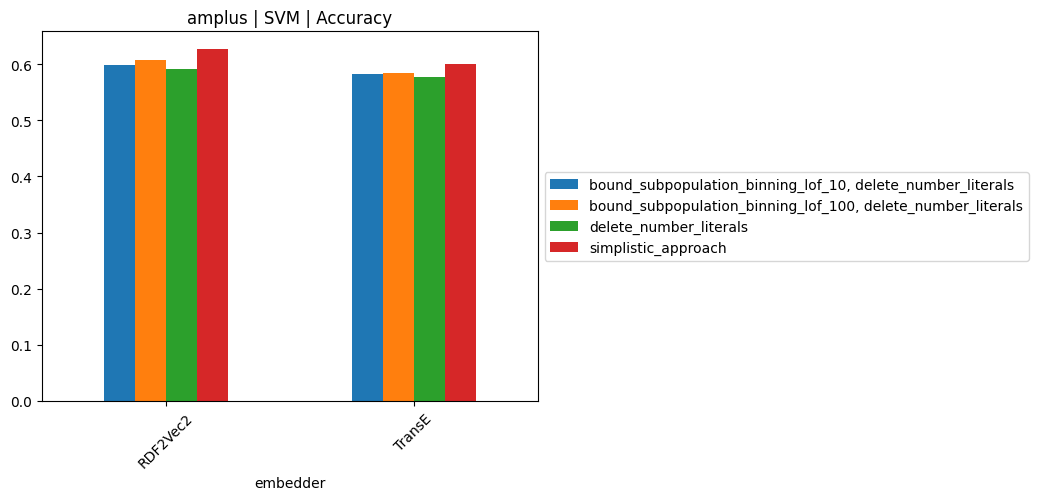

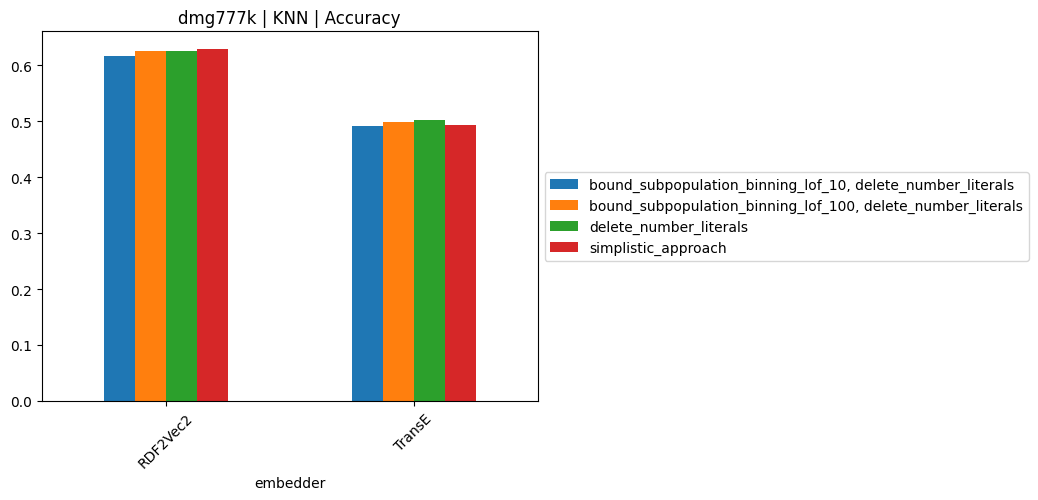

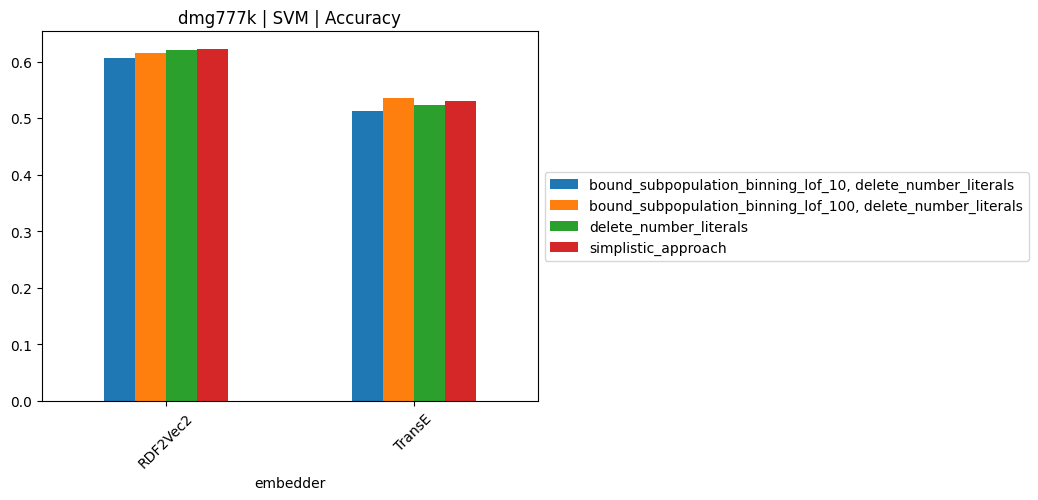

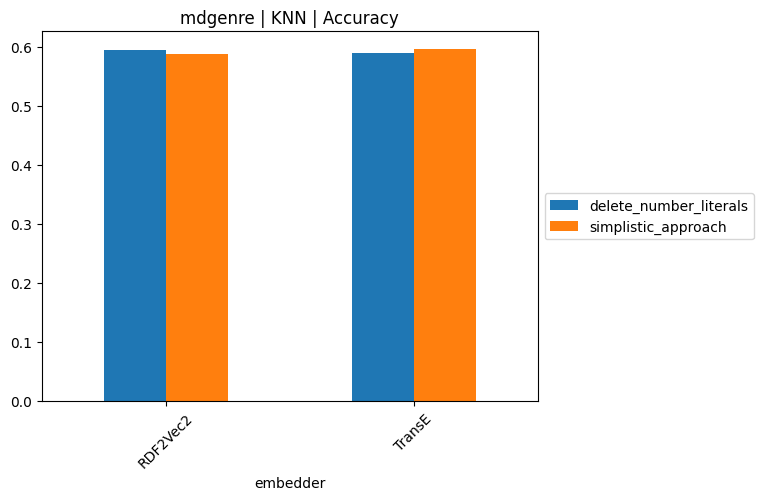

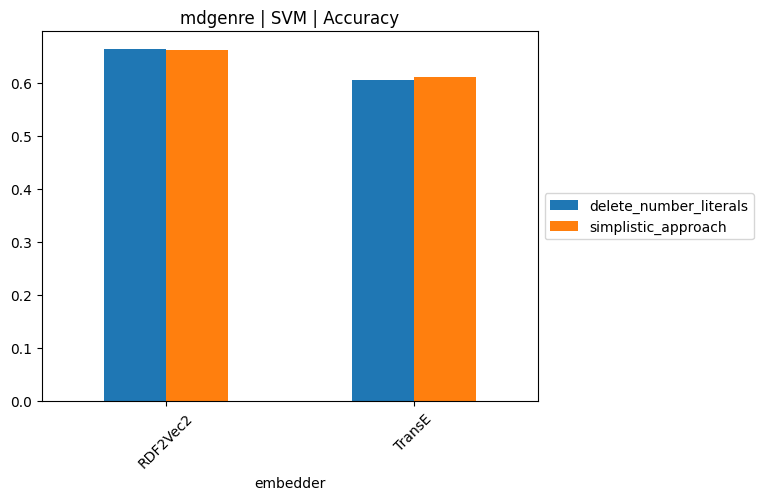

In [115]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bound)|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

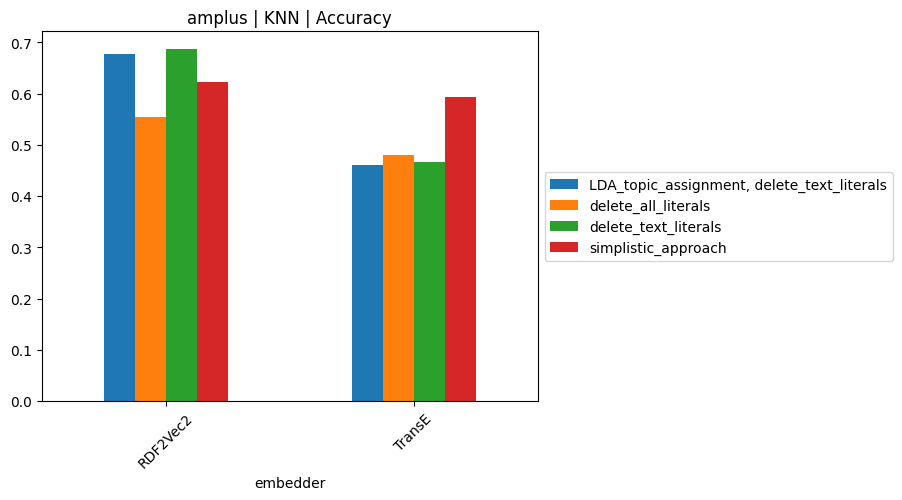

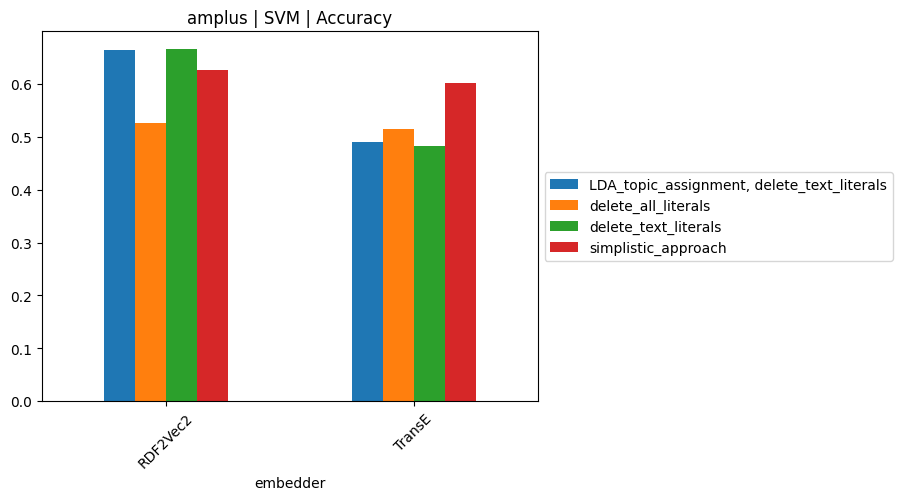

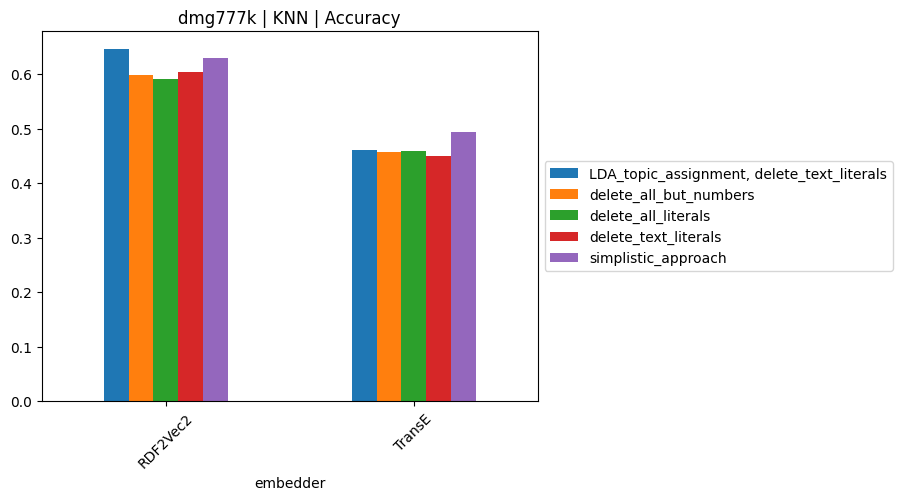

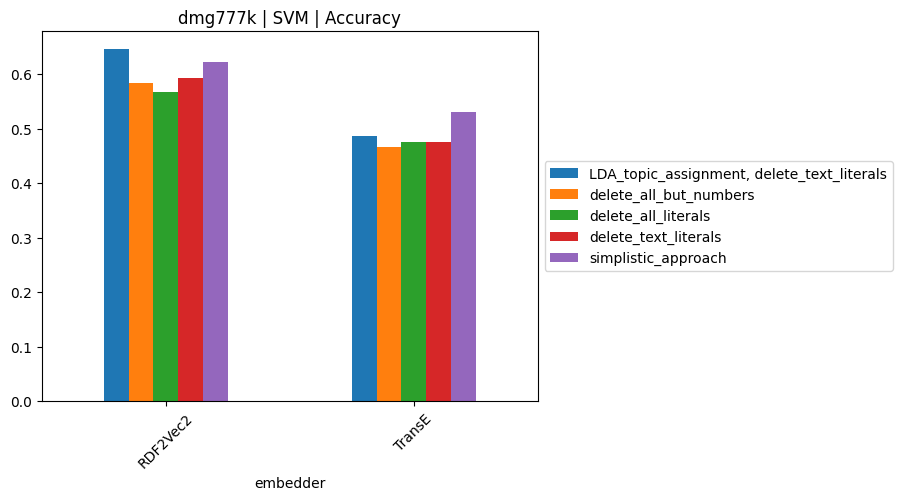

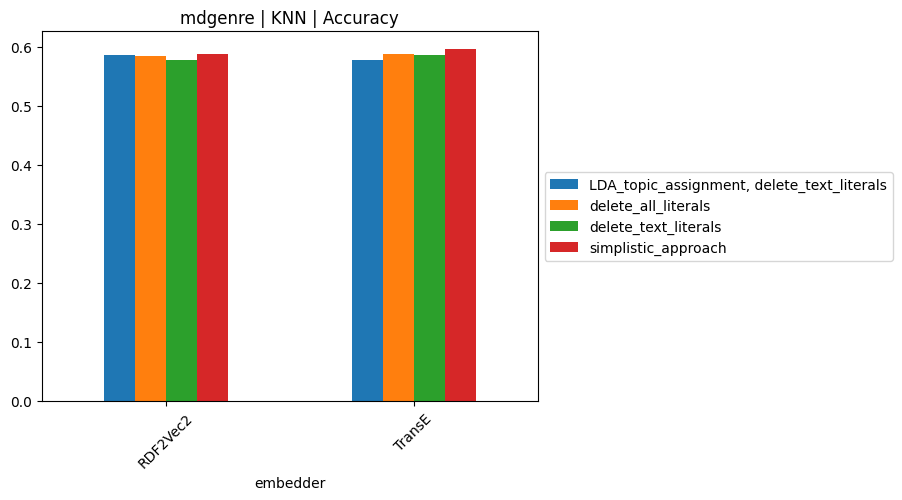

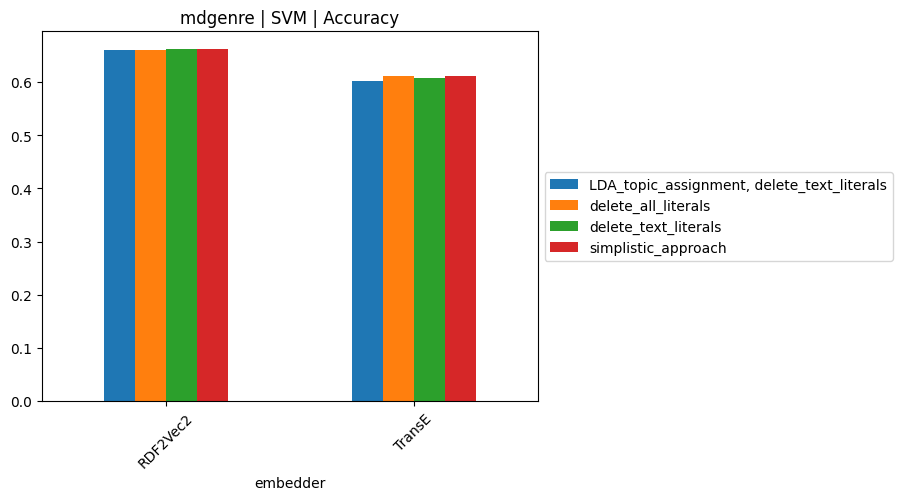

In [118]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((LDA)|simpl|delete_t|delete_a)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

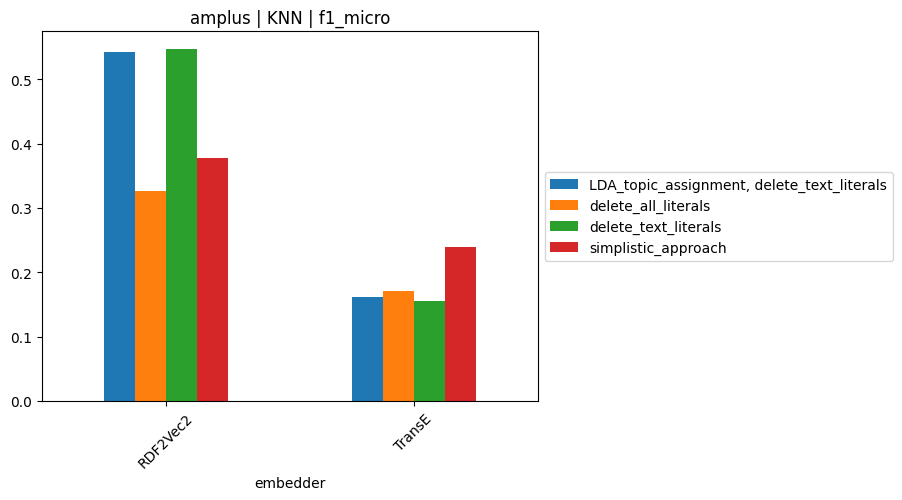

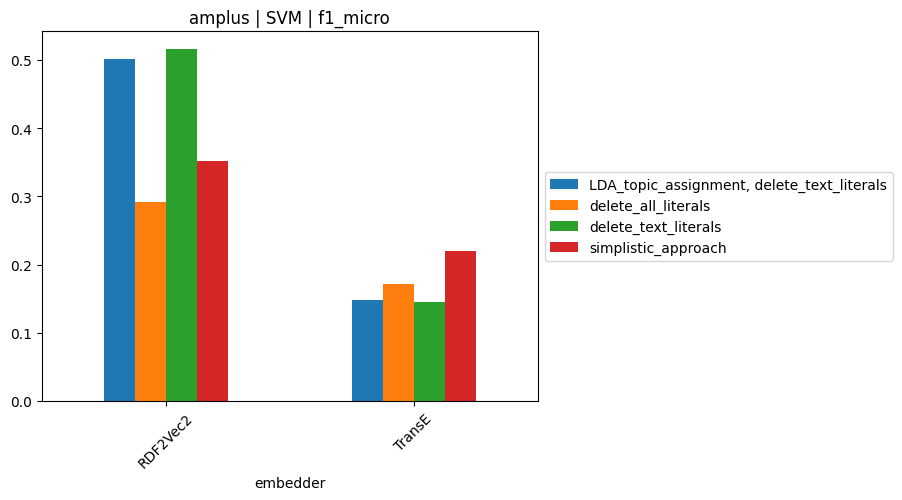

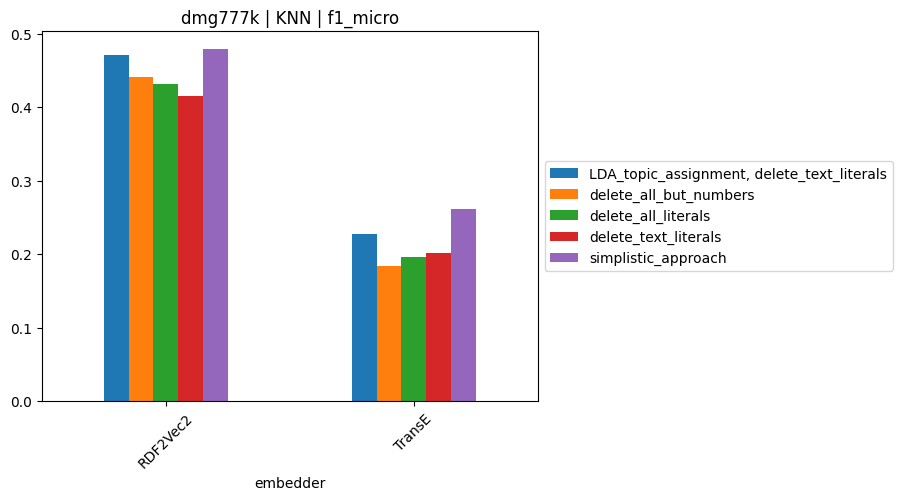

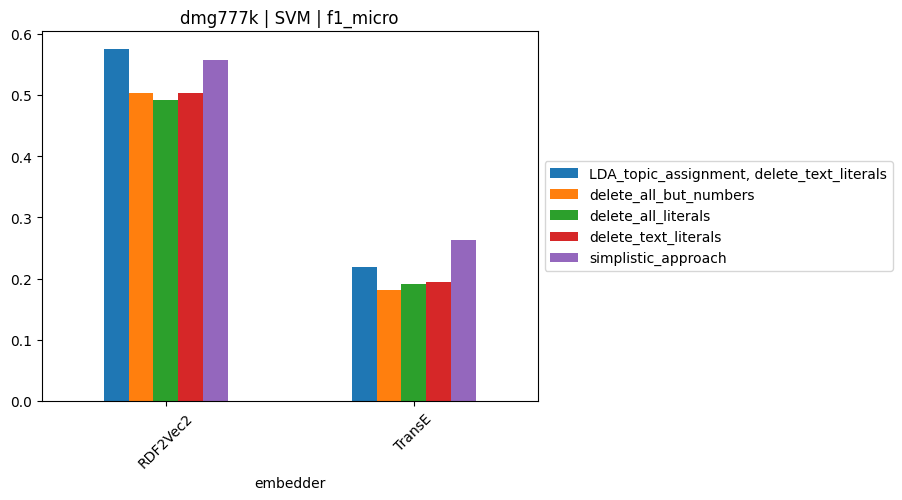

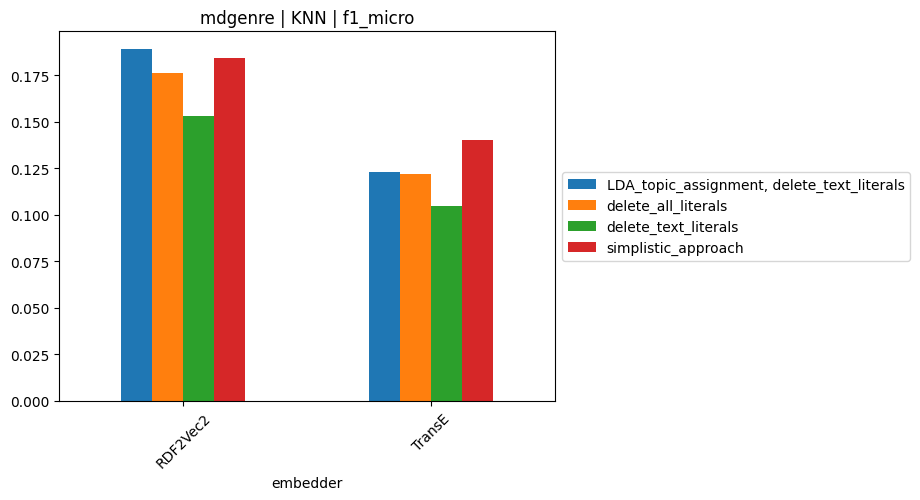

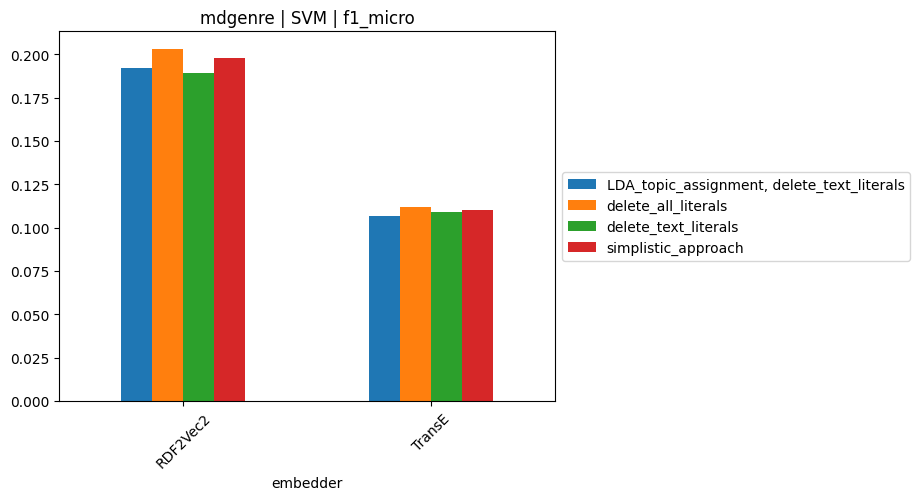

In [120]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((LDA)|simpl|delete_t|delete_a)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1_micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Dataframe

In [123]:
df[(df['dataset']=='amplus')&(df['embedder'] == 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro dataset eval_method  \
92      0.687     0.547  amplus         KNN   
0       0.677     0.542  amplus         KNN   
93      0.666     0.516  amplus         SVM   
1       0.664     0.501  amplus         SVM   
44      0.630     0.394  amplus         KNN   
53      0.629     0.348  amplus         SVM   
32      0.628     0.387  amplus         KNN   
105     0.627     0.352  amplus         SVM   
52      0.626     0.395  amplus         KNN   
36      0.624     0.392  amplus         KNN   

                                                 steps  embedder  
92                                delete_text_literals  RDF2Vec2  
0           LDA_topic_assignment, delete_text_literals  RDF2Vec2  
93                                delete_text_literals  RDF2Vec2  
1           LDA_topic_assignment, delete_text_literals  RDF2Vec2  
44   bin_numbers_lof_percentage_15, delete_number_l...  RDF2Vec2  
53   bin_numbers_lof_percentage_3, simplistic_approach  RDF2Vec2  
32             bin_numbers_lof_10, simplistic_approach  RDF2Vec2  
105                                simplistic_approach  RDF2Vec2  
52   bin_numbers_lof_percentage_3, simplistic_approach  RDF2Vec2  
36         bin_numbers_lof_100, delete_number_literals  RDF2Vec2

In [124]:
df[(df['dataset']=='amplus')&(df['embedder'] == 'TransE') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro dataset eval_method  \
103     0.623     0.276  amplus         SVM   
27      0.622     0.268  amplus         SVM   
102     0.616     0.285  amplus         KNN   
26      0.615     0.297  amplus         KNN   
7       0.609     0.230  amplus         SVM   
71      0.607     0.233  amplus         SVM   
6       0.605     0.264  amplus         KNN   
55      0.604     0.228  amplus         SVM   
35      0.603     0.224  amplus         SVM   
70      0.602     0.250  amplus         KNN   

                                                 steps embedder  
103                    one_entity, simplistic_approach   TransE  
27   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
102                    one_entity, simplistic_approach   TransE  
26   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
7                                       bin_numbers_10   TransE  
71       bin_numbers_percentage_3, simplistic_approach   TransE  
6                                       bin_numbers_10   TransE  
55   bin_numbers_lof_percentage_3, simplistic_approach   TransE  
35             bin_numbers_lof_10, simplistic_approach   TransE  
70       bin_numbers_percentage_3, simplistic_approach   TransE

In [125]:
df[(df['dataset']=='dmg777k')&(df['embedder'] == 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro  dataset eval_method  \
122     0.646     0.471  dmg777k         KNN   
123     0.646     0.575  dmg777k         SVM   
131     0.629     0.555  dmg777k         SVM   
234     0.629     0.479  dmg777k         KNN   
184     0.628     0.475  dmg777k         KNN   
245     0.627     0.552  dmg777k         SVM   
127     0.627     0.558  dmg777k         SVM   
168     0.627     0.477  dmg777k         KNN   
161     0.626     0.557  dmg777k         SVM   
216     0.626     0.484  dmg777k         KNN   

                                                 steps  embedder  
122         LDA_topic_assignment, delete_text_literals  RDF2Vec2  
123         LDA_topic_assignment, delete_text_literals  RDF2Vec2  
131            bin_numbers_100, delete_number_literals  RDF2Vec2  
234                                simplistic_approach  RDF2Vec2  
184   bin_numbers_percentage_3, delete_number_literals  RDF2Vec2  
245  subpopulation_binning_lof_10, simplistic_approach  RDF2Vec2  
127             bin_numbers_10, delete_number_literals  RDF2Vec2  
168  bin_numbers_lof_percentage_3, delete_number_li...  RDF2Vec2  
161          bin_numbers_lof_3, delete_number_literals  RDF2Vec2  
216                             delete_number_literals  RDF2Vec2

In [126]:
df[(df['dataset']=='dmg777k')&(df['embedder'] == 'TransE') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro  dataset eval_method  \
233     0.568     0.331  dmg777k         SVM   
139     0.548     0.300  dmg777k         SVM   
175     0.548     0.285  dmg777k         SVM   
155     0.544     0.264  dmg777k         SVM   
179     0.544     0.271  dmg777k         SVM   
135     0.542     0.272  dmg777k         SVM   
171     0.542     0.276  dmg777k         SVM   
133     0.540     0.276  dmg777k         SVM   
163     0.539     0.280  dmg777k         SVM   
183     0.538     0.270  dmg777k         SVM   

                                                 steps embedder  
233                    one_entity, simplistic_approach   TransE  
139              bin_numbers_3, delete_number_literals   TransE  
175  bin_numbers_lof_percentage_3, simplistic_approach   TransE  
155            bin_numbers_lof_10, simplistic_approach   TransE  
179  bin_numbers_lof_percentage_5, delete_number_li...   TransE  
135                                      bin_numbers_3   TransE  
171  bin_numbers_lof_percentage_3, delete_number_li...   TransE  
133            bin_numbers_100, delete_number_literals   TransE  
163          bin_numbers_lof_3, delete_number_literals   TransE  
183  bin_numbers_percentage_15, delete_number_literals   TransE